In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20,20)})
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn import preprocessing
from sklearn.cluster import KMeans, k_means
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
df1= pd.read_csv('virtualbcluster.csv', error_bad_lines=False, sep=';')
df_italia= pd.read_csv('italia.csv', sep=';')
df_italia = df_italia.rename(columns={'Sigla': 'Prov'})
df1=pd.merge(df1, df_italia, on='Prov')

In [4]:
df1.replace({'Prov': 'NA'}, 'Nap')
df= df1.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash','Regione','ClientDateStart','Prov','Provincia'])

In [5]:
df1.head()

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,...,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,...,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia
1,Client19,0.429550,0.070,4.388.907.809,30.047,0.809524,0.269939,0,0,101134,...,2016,0,PA,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia
2,Client652,0.431233,0.076,12.710.579,40.671,0.714286,0.574847,0,1,42348,...,2016,0,PA,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia
3,Client671,0.414649,0.029,1.070.728.631,19.513,0.809524,0.362577,0,1,479278,...,2015,0,PA,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
4,Client762,0.337011,0.090,7.03,29.743,0.809524,0.433129,1,1,93642,...,2015,1,PA,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia


In [6]:
df.head()

,ClientID,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,NoTrustInBanks
0,Client1,0.597553,0.088,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,0
1,Client19,0.429550,0.070,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,0
2,Client652,0.431233,0.076,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,0
3,Client671,0.414649,0.029,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,0
4,Client762,0.337011,0.090,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,1


In [7]:
df1=df1.loc[df1['PortfolioRisk'] <= 1]
df= df.loc[df['PortfolioRisk'] <= 1]
df= df.loc[df['AuM'] <= 1000000]
df1=df1.loc[df1['AuM'] <= 1000000]

In [8]:
df1.dtypes

ClientID                      object
RiskPropension               float64
PortfolioRisk                float64
ClientInvestmentHorizon       object
PortfolioHorizon              object
ClientKnowledgeExperience    float64
ClientPotentialIndex         float64
IncomeHighLow                  int64
Sex                            int64
AuM                            int64
Age                            int64
IncomeNeed                   float64
LongTermCareNeed             float64
ProtectionNeed               float64
PensionNeed                  float64
InheritanceIndex             float64
PanicMood                      int64
ClientDateStart                int64
NoTrustInBanks                 int64
Prov                          object
BondInvestments              float64
EquityInvestments            float64
MoneyMarketInvestments       float64
OtherInvestments             float64
Cash                         float64
Provincia                     object
Regione                       object
d

In [9]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

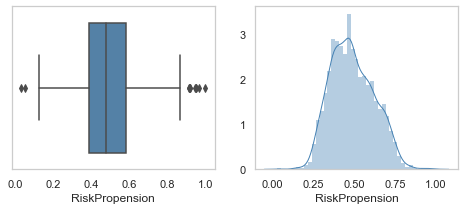

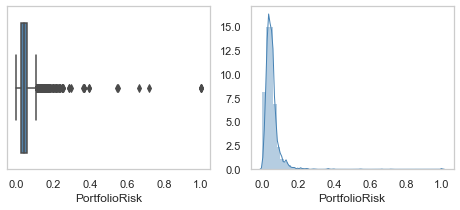

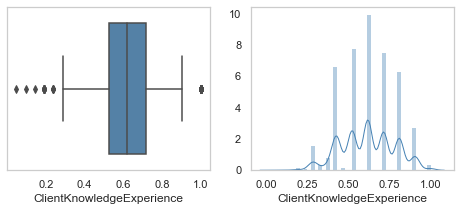

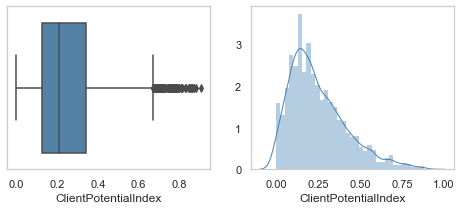

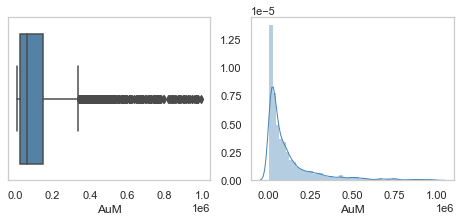

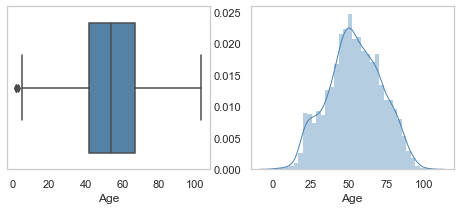

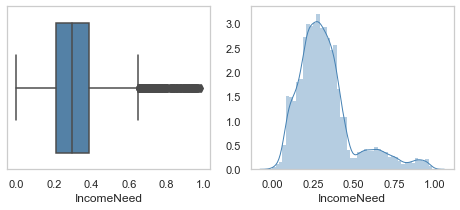

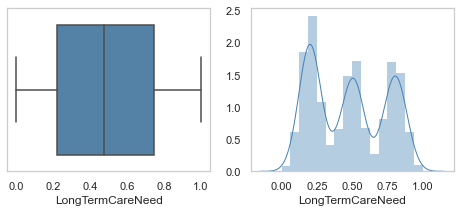

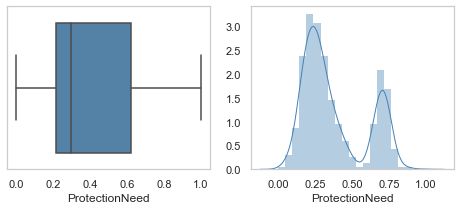

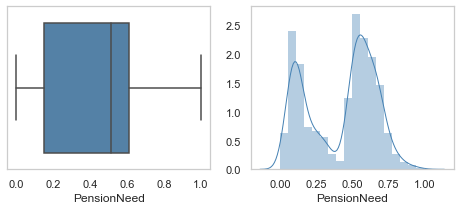

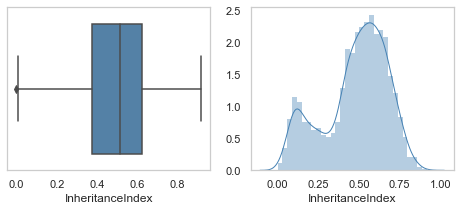

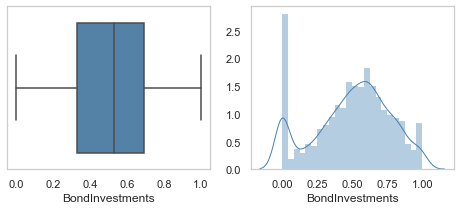

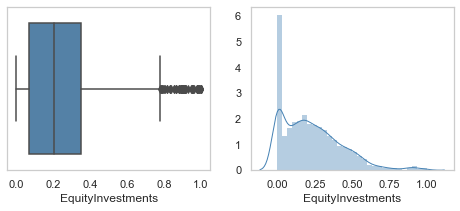

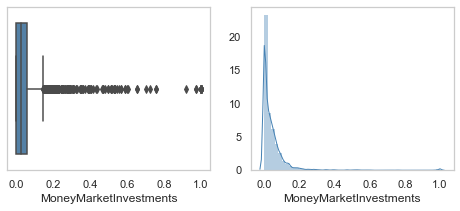

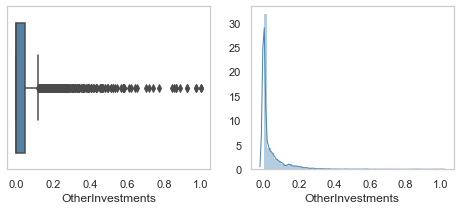

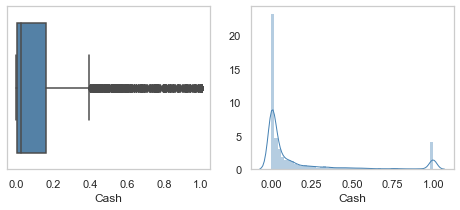

In [10]:
fig_num=1
for col in df1.select_dtypes(include=[np.number]).columns:
    if col in ['RiskPropension','PortfolioRisk','ClientKnowledgeExperience','ClientPotentialIndex','AuM','Age','IncomeNeed','LongTermCareNeed','ProtectionNeed','PensionNeed','InheritanceIndex','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']:
        hist_box_plot(df1,col, fig_num)
        fig_num = fig_num + 1

In [11]:
def biplot(df, x_name, y_name):
    fig, ax = plt.subplots()
    ax.grid(False)
    x = df[x_name]
    y = df[y_name]
    plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('{x_name} vs. {y_name}'.format(x_name=x_name, y_name=y_name))
    plt.show()

In [12]:
sns.set(rc={'figure.figsize':(10,5)})

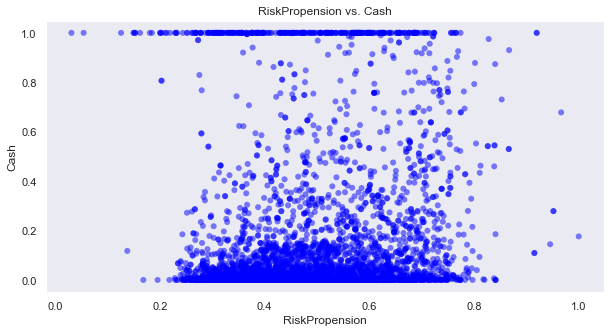

In [13]:
biplot(df=df1,x_name='RiskPropension',y_name='Cash')

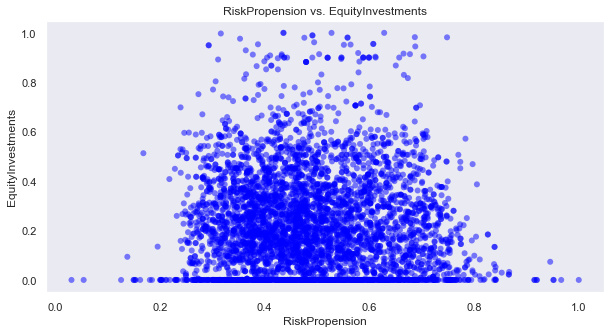

In [14]:
biplot(df=df1,x_name='RiskPropension',y_name='EquityInvestments')

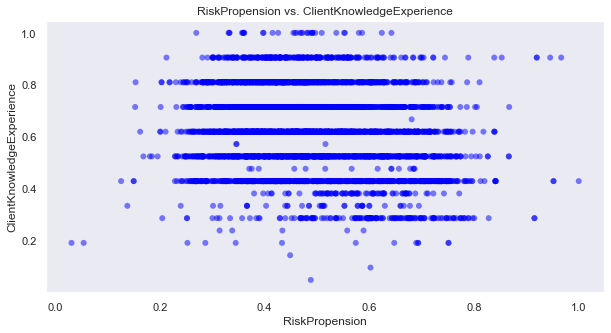

In [15]:
biplot(df=df1,x_name='RiskPropension',y_name='ClientKnowledgeExperience')

In [16]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
#hopkins(Data[Num_features]) deve mettere df1.columns se tra 0.7 a 1 vuol dire che si può clusterizzare

In [18]:
df=df.drop(columns=['ClientID','IncomeHighLow','PanicMood'])

# Inizio procedura per cluster

In [19]:
X=df.drop(columns=['ClientID','IncomeHighLow','PanicMood']).values

In [20]:
from sklearn import preprocessing
#X = preprocessing.scale(X)
X = preprocessing.normalize(X)

In [21]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    lab= kmeans.labels_
    u = metrics.silhouette_score(X, lab, metric='euclidean')
    silhouette.append(u)
    print("The silho for :", f, "Clusters is:", u)

The silho for : 2 Clusters is: 0.6886741697011827
The silho for : 3 Clusters is: 0.6410997740442114
The silho for : 4 Clusters is: 0.607568146544686
The silho for : 5 Clusters is: 0.5898928839014451
The silho for : 6 Clusters is: 0.5605696247294711
The silho for : 7 Clusters is: 0.5572641810235015
The silho for : 8 Clusters is: 0.5494245347506744
The silho for : 9 Clusters is: 0.5490618358995302


In [22]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,10) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    v = kmeans.inertia_
    inertia.append(v)
    print("The innertia for :", f, "Clusters is:", v)

The innertia for : 2 Clusters is: 0.002368413230713032
The innertia for : 3 Clusters is: 0.0010983842148101235
The innertia for : 4 Clusters is: 0.00064059191736581
The innertia for : 5 Clusters is: 0.0004022582236765938
The innertia for : 6 Clusters is: 0.00029060215475302126
The innertia for : 7 Clusters is: 0.00021597892526499008
The innertia for : 8 Clusters is: 0.0001730532031116807
The innertia for : 9 Clusters is: 0.00013699794297502129


Text(0.5, 1.0, 'Inertia Plot per k')

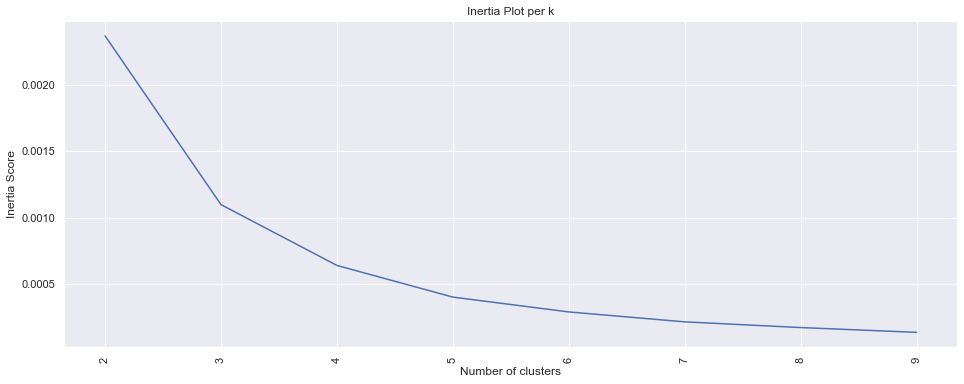

In [23]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [24]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,1275,162,2583,526


Explained variance ratio (first two components): [9.99282846e-01 4.21176307e-04]


<Figure size 720x360 with 0 Axes>

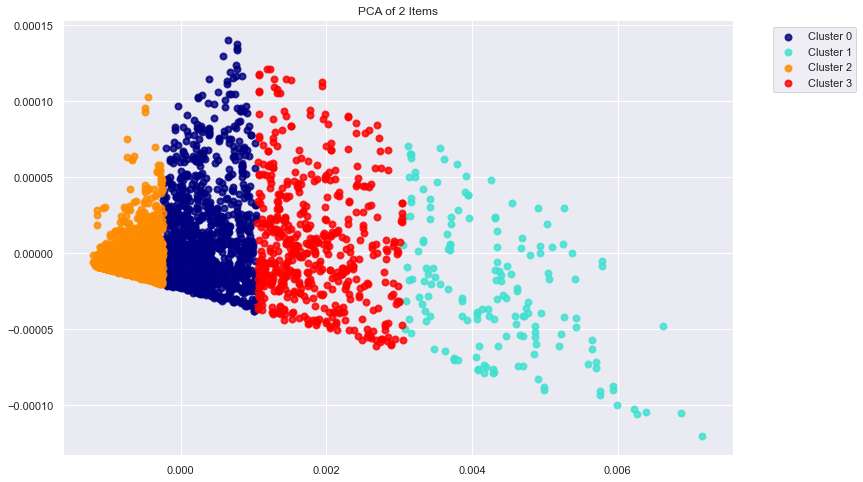

In [25]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  1.5434787663097548e-06
The 95% variance we want to have is:  1.466304827994267e-06

Variance explain with 2 n_compononets:  1.5430219313784026e-06
Variance explain with 3 n_compononets:  1.5432757367231624e-06
Variance explain with 5 n_compononets:  1.5434063557894618e-06
Variance explain with 7 n_compononets:  1.5434487099142267e-06
Variance explain with 8 n_compononets:  1.543459487595794e-06
Variance explain with 10 n_compononets:  1.5434746967991523e-06
Variance explain with 12 n_compononets:  1.5434779087509797e-06
Variance explain with 15 n_compononets:  1.5434787663097548e-06


Text(0, 0.5, 'explained_ratio_')

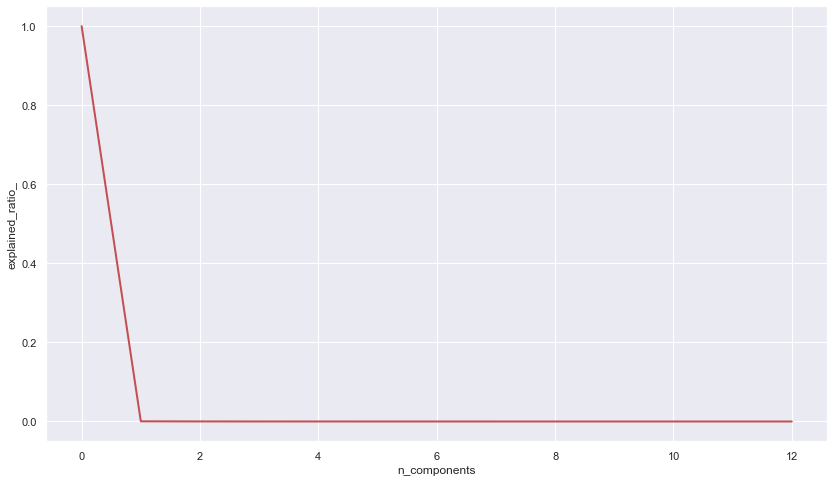

In [26]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

The innertia for : 2 Clusters is: 0.0023663635767685815
The innertia for : 3 Clusters is: 0.0010963381798879562
The innertia for : 4 Clusters is: 0.0006385636664420969
The innertia for : 5 Clusters is: 0.0004002907367219337
The innertia for : 6 Clusters is: 0.0002885161831380388
The innertia for : 7 Clusters is: 0.0002139544992077767
The innertia for : 8 Clusters is: 0.00017114292749759183
The innertia for : 9 Clusters is: 0.00013573027221402224


Text(0.5, 1.0, 'Inertia Plot per k')

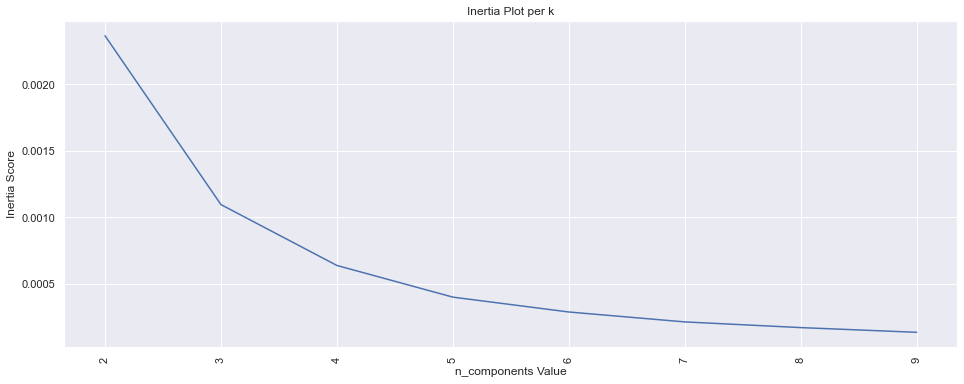

In [27]:
# Running PCA again

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [28]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_r)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_r)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,1276,162,2582,526


In [29]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    lab= kmeans.labels_
    u = metrics.silhouette_score(X_r, lab, metric='euclidean')
    silhouette.append(u)
    print("The silho for :", f, "Clusters is:", u)

The silho for : 2 Clusters is: 0.6890786261105465
The silho for : 3 Clusters is: 0.6419401745142526
The silho for : 4 Clusters is: 0.6088943897164343
The silho for : 5 Clusters is: 0.5908367484288142
The silho for : 6 Clusters is: 0.564430392000674
The silho for : 7 Clusters is: 0.5606228365611782
The silho for : 8 Clusters is: 0.5540380521000168
The silho for : 9 Clusters is: 0.5536749661904679


# Ho una silhouette di 0.61

In [30]:
# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = predictions

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'
df['Clusters Category'].loc[df['Clusters'] == 3] = 'Cluster 4'



C:\Users\emanu\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
#clientID= pd.Series(df1.ClientID)
#df['ClientID'] = clientID

In [32]:
df=df.drop(columns=['Clusters Category'])

In [33]:
df.dtypes

RiskPropension               float64
PortfolioRisk                float64
ClientKnowledgeExperience    float64
ClientPotentialIndex         float64
Sex                            int64
AuM                            int64
Age                            int64
IncomeNeed                   float64
LongTermCareNeed             float64
ProtectionNeed               float64
PensionNeed                  float64
InheritanceIndex             float64
NoTrustInBanks                 int64
Clusters                       int32
dtype: object

# Adesso faccio i cluster dei cluster

In [34]:
dfC0=df.loc[df['Clusters'] == 0]
dfC1=df.loc[df['Clusters'] == 1]
dfC2=df.loc[df['Clusters'] == 2]
dfC3=df.loc[df['Clusters'] == 3]

In [35]:
Xc0= dfC0.values
Xc1= dfC1.values
Xc2= dfC2.values
Xc3= dfC3.values

In [36]:
Xc0 = preprocessing.normalize(Xc0)
Xc1 = preprocessing.normalize(Xc1)
Xc2 = preprocessing.normalize(Xc2)
Xc3 = preprocessing.normalize(Xc3)

In [37]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters1 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette1 = []


for f in no_of_clusters1:
    kmeans1 = KMeans(n_clusters=f, random_state=2)
    kmeans1 = kmeans1.fit(Xc0)
    lab1= kmeans1.labels_
    u1 = metrics.silhouette_score(Xc0, lab1, metric='euclidean')
    silhouette1.append(u1)
    print("The silho for :", f, "Clusters is:", u1)

The silho for : 2 Clusters is: 0.6151868099048389
The silho for : 3 Clusters is: 0.5906241415436551
The silho for : 4 Clusters is: 0.5270021561902032
The silho for : 5 Clusters is: 0.505496599375343
The silho for : 6 Clusters is: 0.484707290354815
The silho for : 7 Clusters is: 0.4592470153269906
The silho for : 8 Clusters is: 0.42821348191049546
The silho for : 9 Clusters is: 0.4125088677448274


In [38]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters1 = range(2,10) #[2,3,4,5,6,7,8,9]
inertia1 = []


for f in no_of_clusters1:
    kmeans1 = KMeans(n_clusters=f, random_state=2)
    kmeans1 = kmeans1.fit(Xc0)
    v1 = kmeans1.inertia_
    inertia1.append(v1)
    print("The innertia for :", f, "Clusters is:", v1)

The innertia for : 2 Clusters is: 4.552051099188455e-05
The innertia for : 3 Clusters is: 1.9213552671049873e-05
The innertia for : 4 Clusters is: 1.2659364308278144e-05
The innertia for : 5 Clusters is: 8.478285527957691e-06
The innertia for : 6 Clusters is: 6.445927659230405e-06
The innertia for : 7 Clusters is: 5.348569258905219e-06
The innertia for : 8 Clusters is: 4.5333762436613896e-06
The innertia for : 9 Clusters is: 4.034043747371323e-06


Text(0.5, 1.0, 'Inertia Plot per k')

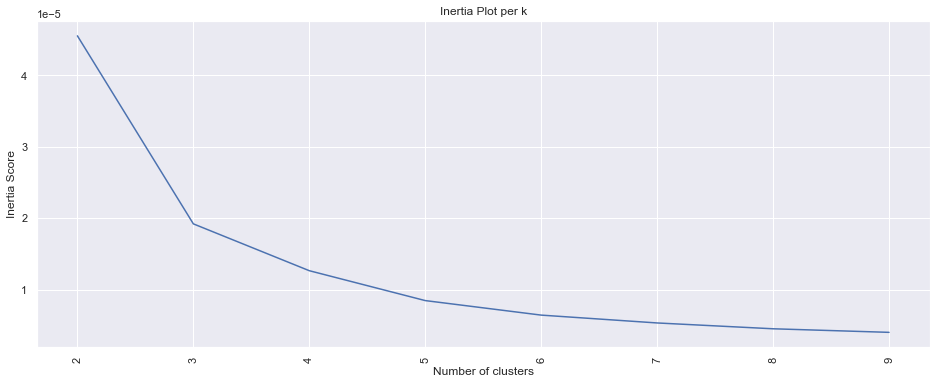

In [39]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters1))
ax1.plot(xx, inertia1)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters1, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [40]:
# Running K means on 5 clusters

kmeans1 = KMeans(n_clusters=3, random_state=2)
kmeans1 = kmeans1.fit(Xc0)


kmeans1.labels_

# "predictions" for new data
predictions1 = kmeans1.predict(Xc0)

# calculating the Counts of the cluster
unique1, counts1 = np.unique(predictions1, return_counts=True)
counts1= counts1.reshape(1,3)

# Creating a datagrame
countscldf1 = pd.DataFrame(counts1, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf1

,Cluster 0,Cluster 1,Cluster 2
0,415,324,537


Explained variance ratio (first two components): [0.9885781  0.00727138]


<Figure size 720x360 with 0 Axes>

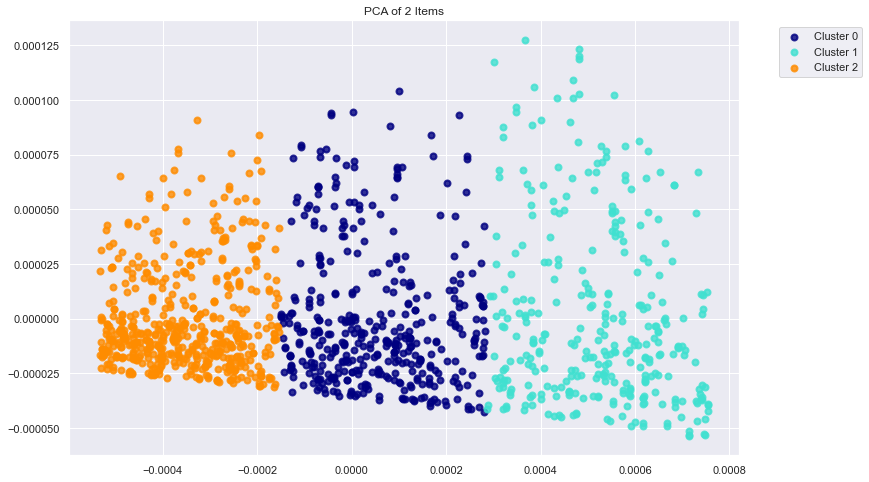

In [41]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictions1

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca1 = PCA(n_components=2, random_state = 453)
Xc0_r = pca1.fit(Xc0).transform(Xc0)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca1.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xc0_r[y_num == i, 0], Xc0_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  1.3725759395120474e-07
The 95% variance we want to have is:  1.303947142536445e-07

Variance explain with 2 n_compononets:  1.3668790440875426e-07
Variance explain with 3 n_compononets:  1.3704410892806572e-07
Variance explain with 5 n_compononets:  1.3718516186212675e-07
Variance explain with 7 n_compononets:  1.3722995936144373e-07
Variance explain with 8 n_compononets:  1.37241432295418e-07
Variance explain with 10 n_compononets:  1.3725363721629463e-07
Variance explain with 12 n_compononets:  1.3725759033619806e-07
Variance explain with 15 n_compononets:  1.3725759395120474e-07


Text(0, 0.5, 'explained_ratio_')

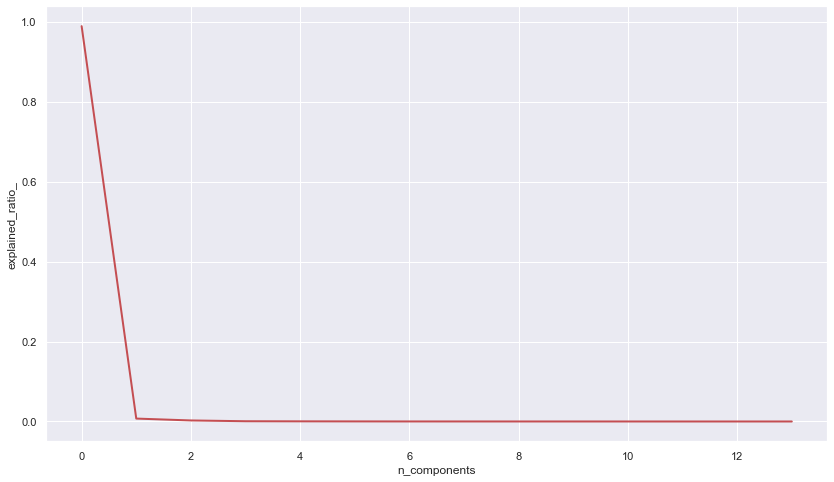

In [42]:
# Trying with Dimentionality reduction and then Kmeans

n_components1 = Xc0.shape[1]

# Running PCA with all components
pca1 = PCA(n_components=n_components1, random_state = 453)
Xc0_r = pca1.fit(Xc0).transform(Xc0)


# Calculating the 95% Variance
total_variance = sum(pca1.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components1), pca1.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca1.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

The innertia for : 2 Clusters is: 4.479451337905858e-05
The innertia for : 3 Clusters is: 1.8490505475878176e-05
The innertia for : 4 Clusters is: 1.193607309989462e-05
The innertia for : 5 Clusters is: 7.754778656868085e-06
The innertia for : 6 Clusters is: 5.725605512499026e-06
The innertia for : 7 Clusters is: 4.625073766815175e-06
The innertia for : 8 Clusters is: 3.8127306416931114e-06
The innertia for : 9 Clusters is: 3.315795336718719e-06


Text(0.5, 1.0, 'Inertia Plot per k')

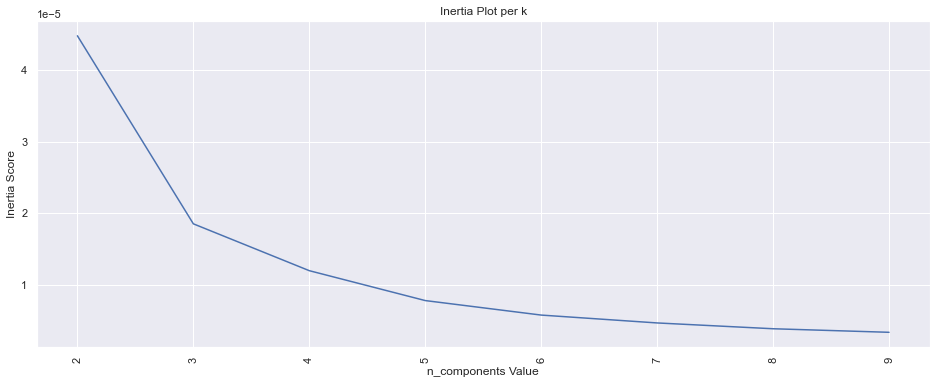

In [43]:
# Running PCA again

pca1 = PCA(n_components=2, random_state = 453)
Xc0_r = pca1.fit(Xc0).transform(Xc0)

inertia1 = []

#running Kmeans

for f in no_of_clusters1:
    kmeans1 = KMeans(n_clusters=f, random_state=2)
    kmeans1 = kmeans1.fit(Xc0_r)
    u1 = kmeans1.inertia_
    inertia1.append(u1)
    print("The innertia for :", f, "Clusters is:", u1)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters1))
ax1.plot(xx, inertia1)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters1, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [44]:
# Running K means on 5 clusters

kmeans1 = KMeans(n_clusters=3, random_state=2)
kmeans1 = kmeans1.fit(Xc0_r)


kmeans1.labels_

# "predictions" for new data
predictions1 = kmeans1.predict(Xc0_r)

# calculating the Counts of the cluster
unique1, counts1 = np.unique(predictions1, return_counts=True)
counts1 = counts1.reshape(1,3)

# Creating a datagrame
countscldf1 = pd.DataFrame(counts1, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf1

,Cluster 0,Cluster 1,Cluster 2
0,540,322,414


In [45]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters1 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette1 = []


for f in no_of_clusters1:
    kmeans1 = KMeans(n_clusters=f, random_state=2)
    kmeans1 = kmeans1.fit(Xc0_r)
    lab1= kmeans1.labels_
    u1= metrics.silhouette_score(Xc0_r, lab1, metric='euclidean')
    silhouette1.append(u1)
    print("The silho for :", f, "Clusters is:", u1)

The silho for : 2 Clusters is: 0.6209072080376069
The silho for : 3 Clusters is: 0.6023572019793076
The silho for : 4 Clusters is: 0.5433860007686113
The silho for : 5 Clusters is: 0.5300310023296513
The silho for : 6 Clusters is: 0.5138231966017749
The silho for : 7 Clusters is: 0.49773201172390547
The silho for : 8 Clusters is: 0.4706789506644524
The silho for : 9 Clusters is: 0.45242365939340723


In [46]:
dfC0['ClustersC0'] = predictions1

<ipython-input-46-2c374add23d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC0['ClustersC0'] = predictions1


## Secondo cluster

In [47]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters2 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette2 = []


for f in no_of_clusters2:
    kmeans2 = KMeans(n_clusters=f, random_state=2)
    kmeans2 = kmeans2.fit(Xc1)
    lab2= kmeans2.labels_
    u2 = metrics.silhouette_score(Xc1, lab2, metric='euclidean')
    silhouette2.append(u2)
    print("The silho for :", f, "Clusters is:", u2)

The silho for : 2 Clusters is: 0.5703483031795097
The silho for : 3 Clusters is: 0.5865093104071686
The silho for : 4 Clusters is: 0.5479736252258768
The silho for : 5 Clusters is: 0.5487286934300696
The silho for : 6 Clusters is: 0.5478547740316673
The silho for : 7 Clusters is: 0.5392650599752019
The silho for : 8 Clusters is: 0.5082352275313092
The silho for : 9 Clusters is: 0.48547341992785975


In [48]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters2 = range(2,10) #[2,3,4,5,6,7,8,9]
inertia2 = []


for f in no_of_clusters2:
    kmeans2 = KMeans(n_clusters=f, random_state=2)
    kmeans2 = kmeans2.fit(Xc1)
    v2 = kmeans2.inertia_
    inertia2.append(v2)
    print("The innertia for :", f, "Clusters is:", v2)

The innertia for : 2 Clusters is: 4.3491287118579143e-05
The innertia for : 3 Clusters is: 1.8755966941431227e-05
The innertia for : 4 Clusters is: 1.1492199080893947e-05
The innertia for : 5 Clusters is: 7.969182258011622e-06
The innertia for : 6 Clusters is: 5.068350087944734e-06
The innertia for : 7 Clusters is: 3.886512979043757e-06
The innertia for : 8 Clusters is: 3.239785020817381e-06
The innertia for : 9 Clusters is: 2.7451742275039937e-06


Text(0.5, 1.0, 'Inertia Plot per k')

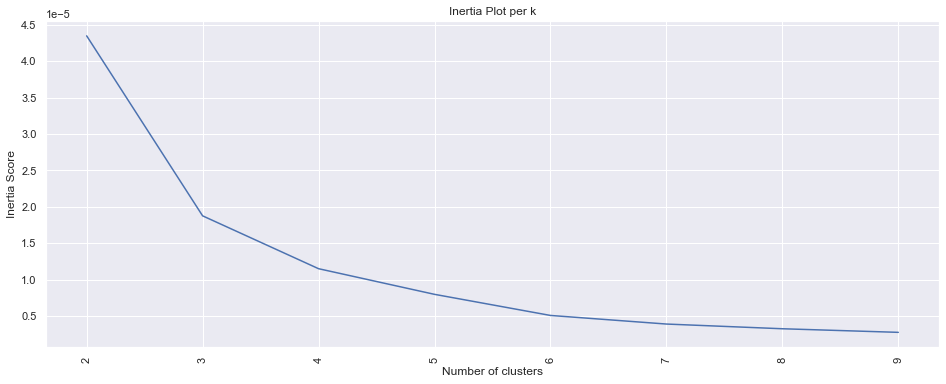

In [49]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters2))
ax1.plot(xx, inertia2)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters2, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [50]:
# Running K means on 5 clusters

kmeans2 = KMeans(n_clusters=3, random_state=2)
kmeans2 = kmeans2.fit(Xc1)


kmeans2.labels_

# "predictions" for new data
predictions2 = kmeans2.predict(Xc1)

# calculating the Counts of the cluster
unique2, counts2 = np.unique(predictions2, return_counts=True)
counts2= counts2.reshape(1,3)

# Creating a datagrame
countscldf2 = pd.DataFrame(counts2, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf2

,Cluster 0,Cluster 1,Cluster 2
0,68,27,67


Explained variance ratio (first two components): [0.99521162 0.00254904]


<Figure size 720x360 with 0 Axes>

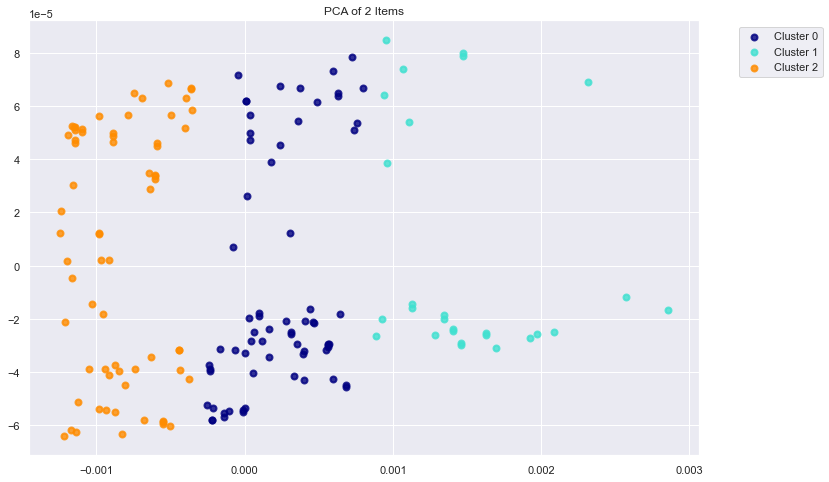

In [51]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictions2

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca2 = PCA(n_components=2, random_state = 453)
Xc1_r = pca2.fit(Xc1).transform(Xc1)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca2.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xc1_r[y_num == i, 0], Xc1_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  8.055989043531655e-07
The 95% variance we want to have is:  7.653189591355072e-07

Variance explain with 2 n_compononets:  8.037948891793489e-07
Variance explain with 3 n_compononets:  8.046379142238422e-07
Variance explain with 5 n_compononets:  8.052753560000942e-07
Variance explain with 7 n_compononets:  8.054820595539903e-07
Variance explain with 8 n_compononets:  8.055396206583016e-07
Variance explain with 10 n_compononets:  8.055858232596648e-07
Variance explain with 12 n_compononets:  8.055986851144372e-07
Variance explain with 15 n_compononets:  8.055989043531655e-07


Text(0, 0.5, 'explained_ratio_')

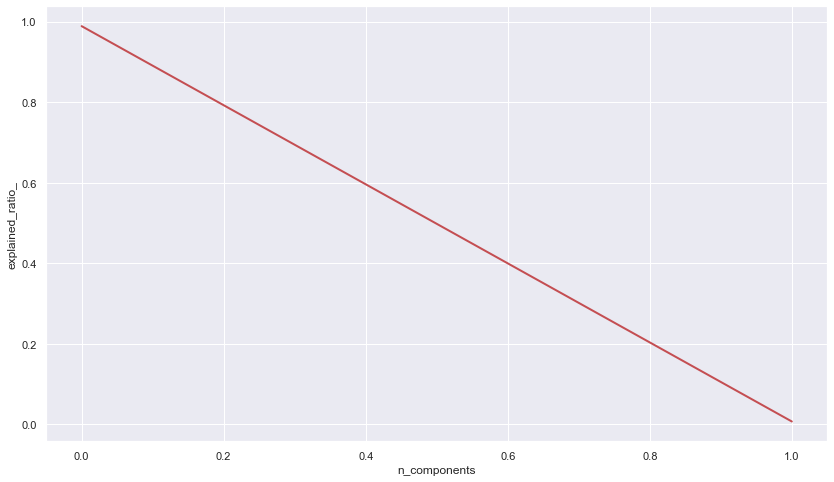

In [52]:
# Trying with Dimentionality reduction and then Kmeans

n_components2 = Xc1.shape[1]

# Running PCA with all components
pca2 = PCA(n_components=n_components2, random_state = 453)
Xc1_r = pca2.fit(Xc1).transform(Xc1)


# Calculating the 95% Variance
total_variance = sum(pca2.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components2), pca2.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca1.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

The innertia for : 2 Clusters is: 4.3201155772937635e-05
The innertia for : 3 Clusters is: 1.8469032514495845e-05
The innertia for : 4 Clusters is: 1.1208573881079324e-05
The innertia for : 5 Clusters is: 7.688736308307394e-06
The innertia for : 6 Clusters is: 4.790981748530367e-06
The innertia for : 7 Clusters is: 3.6113470556021423e-06
The innertia for : 8 Clusters is: 3.005807171400354e-06
The innertia for : 9 Clusters is: 2.394093673081955e-06


Text(0.5, 1.0, 'Inertia Plot per k')

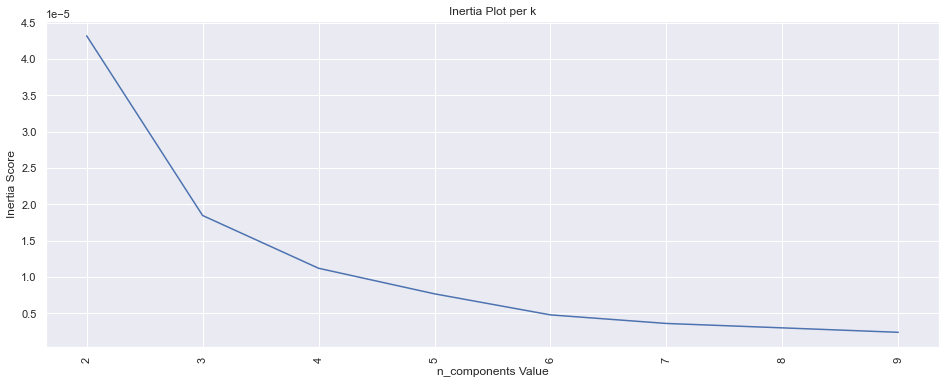

In [53]:
# Running PCA again

pca2 = PCA(n_components=2, random_state = 453)
Xc1_r = pca2.fit(Xc1).transform(Xc1)

inertia2 = []

#running Kmeans

for f in no_of_clusters2:
    kmeans2 = KMeans(n_clusters=f, random_state=2)
    kmeans2 = kmeans2.fit(Xc1_r)
    u2 = kmeans2.inertia_
    inertia2.append(u2)
    print("The innertia for :", f, "Clusters is:", u2)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters2))
ax1.plot(xx, inertia2)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters2, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [54]:
# Running K means on 5 clusters

kmeans2 = KMeans(n_clusters=3, random_state=2)
kmeans2 = kmeans2.fit(Xc1_r)


kmeans2.labels_

# "predictions" for new data
predictions2 = kmeans2.predict(Xc1_r)

# calculating the Counts of the cluster
unique2, counts2 = np.unique(predictions2, return_counts=True)
counts2 = counts2.reshape(1,3)

# Creating a datagrame
countscldf2 = pd.DataFrame(counts2, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf2

,Cluster 0,Cluster 1,Cluster 2
0,68,27,67


In [55]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters2 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette2 = []


for f in no_of_clusters2:
    kmeans2 = KMeans(n_clusters=f, random_state=2)
    kmeans2 = kmeans2.fit(Xc1_r)
    lab2= kmeans2.labels_
    u2= metrics.silhouette_score(Xc1_r, lab2, metric='euclidean')
    silhouette2.append(u2)
    print("The silho for :", f, "Clusters is:", u2)

The silho for : 2 Clusters is: 0.5745414918341712
The silho for : 3 Clusters is: 0.5940226107748449
The silho for : 4 Clusters is: 0.5597268309047759
The silho for : 5 Clusters is: 0.5624952592788922
The silho for : 6 Clusters is: 0.5692416829373359
The silho for : 7 Clusters is: 0.5642263015147226
The silho for : 8 Clusters is: 0.5279775992183278
The silho for : 9 Clusters is: 0.5408571274036731


In [56]:
dfC1['ClustersC1'] = predictions2

<ipython-input-56-17f84b0b38ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC1['ClustersC1'] = predictions2


# Terzo cluster

In [57]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters3 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette3 = []


for f in no_of_clusters3:
    kmeans3 = KMeans(n_clusters=f, random_state=2)
    kmeans3 = kmeans3.fit(Xc2)
    lab3= kmeans3.labels_
    u3 = metrics.silhouette_score(Xc2, lab3, metric='euclidean')
    silhouette3.append(u3)
    print("The silho for :", f, "Clusters is:", u3)

The silho for : 2 Clusters is: 0.6166023118413521
The silho for : 3 Clusters is: 0.591212883887779
The silho for : 4 Clusters is: 0.5424584834112769
The silho for : 5 Clusters is: 0.5421285455058349
The silho for : 6 Clusters is: 0.522722783474859
The silho for : 7 Clusters is: 0.5102986557247157
The silho for : 8 Clusters is: 0.5000779580805963
The silho for : 9 Clusters is: 0.48916889821242576


In [58]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters3 = range(2,10) #[2,3,4,5,6,7,8,9]
inertia3 = []


for f in no_of_clusters3:
    kmeans3 = KMeans(n_clusters=f, random_state=2)
    kmeans3 = kmeans3.fit(Xc2)
    v3 = kmeans3.inertia_
    inertia3.append(v3)
    print("The innertia for :", f, "Clusters is:", v3)

The innertia for : 2 Clusters is: 4.46903063253053e-05
The innertia for : 3 Clusters is: 1.941202009092984e-05
The innertia for : 4 Clusters is: 1.2132528538924153e-05
The innertia for : 5 Clusters is: 7.620622215528483e-06
The innertia for : 6 Clusters is: 5.635612119769675e-06
The innertia for : 7 Clusters is: 4.357665017995309e-06
The innertia for : 8 Clusters is: 3.4755732641772406e-06
The innertia for : 9 Clusters is: 2.905274897852327e-06


Text(0.5, 1.0, 'Inertia Plot per k')

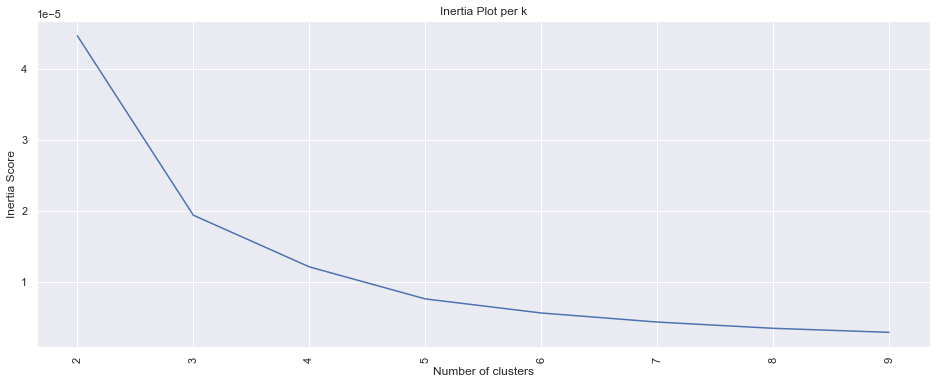

In [59]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters3))
ax1.plot(xx, inertia3)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters3, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [60]:
# Running K means on 5 clusters

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(Xc2)


kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(Xc2)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3= counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf3

,Cluster 0,Cluster 1,Cluster 2
0,1065,823,694


Explained variance ratio (first two components): [0.99557095 0.00331152]


<Figure size 720x360 with 0 Axes>

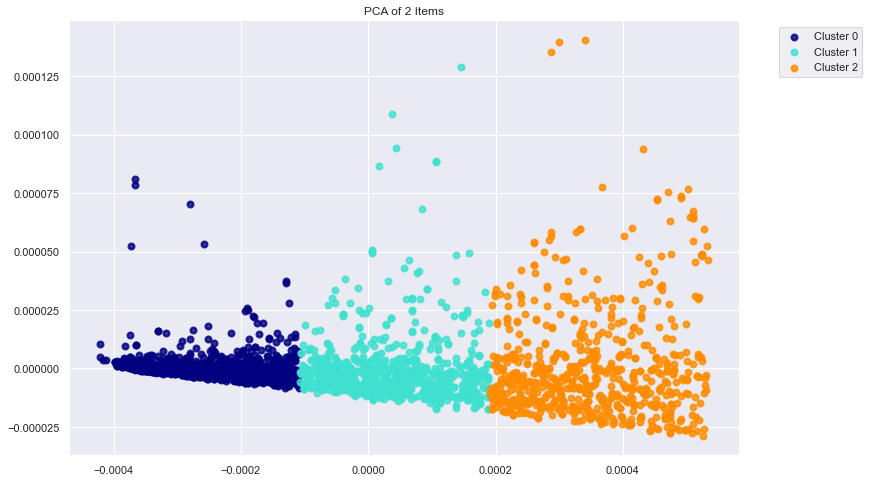

In [61]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictions3

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca3 = PCA(n_components=2, random_state = 453)
Xc2_r = pca3.fit(Xc2).transform(Xc2)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca3.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xc2_r[y_num == i, 0], Xc2_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  6.624992080698895e-08
The 95% variance we want to have is:  6.29374247666395e-08

Variance explain with 2 n_compononets:  6.61758843496935e-08
Variance explain with 3 n_compononets:  6.621078314624576e-08
Variance explain with 5 n_compononets:  6.62331912092364e-08
Variance explain with 7 n_compononets:  6.62439487923422e-08
Variance explain with 8 n_compononets:  6.624688904966763e-08
Variance explain with 10 n_compononets:  6.624895320444592e-08
Variance explain with 12 n_compononets:  6.62497461660347e-08
Variance explain with 15 n_compononets:  6.624992080698895e-08


Text(0, 0.5, 'explained_ratio_')

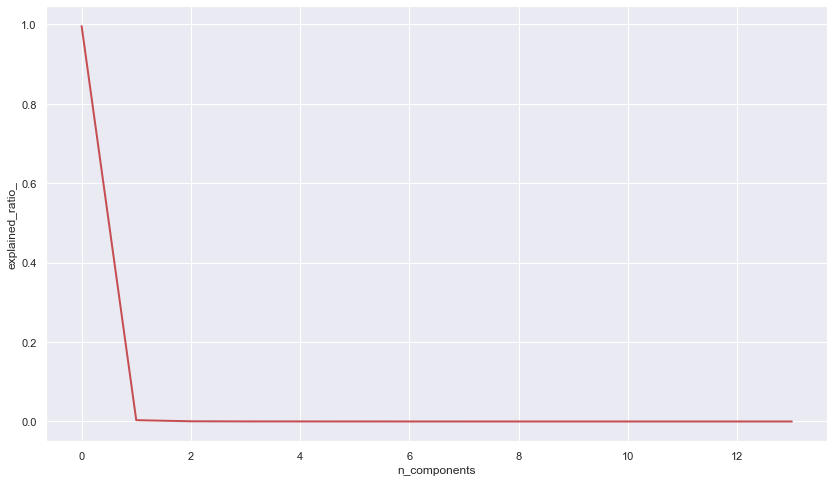

In [62]:
# Trying with Dimentionality reduction and then Kmeans

n_components3 = Xc2.shape[1]

# Running PCA with all components
pca3 = PCA(n_components=n_components2, random_state = 453)
Xc2_r = pca3.fit(Xc2).transform(Xc2)


# Calculating the 95% Variance
total_variance = sum(pca3.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components3), pca3.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca3.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

The innertia for : 2 Clusters is: 4.449997626250173e-05
The innertia for : 3 Clusters is: 1.9222851873415992e-05
The innertia for : 4 Clusters is: 1.1948253042610338e-05
The innertia for : 5 Clusters is: 7.433294767206169e-06
The innertia for : 6 Clusters is: 5.445917353409675e-06
The innertia for : 7 Clusters is: 4.1782758665697624e-06
The innertia for : 8 Clusters is: 3.2890120372670895e-06
The innertia for : 9 Clusters is: 2.7167795505854803e-06


Text(0.5, 1.0, 'Inertia Plot per k')

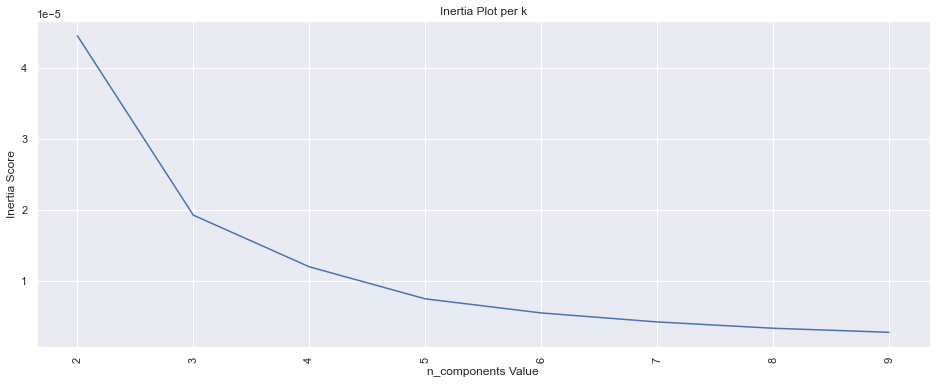

In [63]:
# Running PCA again

pca3 = PCA(n_components=2, random_state = 453)
Xc2_r = pca3.fit(Xc2).transform(Xc2)

inertia3 = []

#running Kmeans

for f in no_of_clusters3:
    kmeans3 = KMeans(n_clusters=f, random_state=2)
    kmeans3 = kmeans3.fit(Xc2_r)
    u3 = kmeans3.inertia_
    inertia3.append(u3)
    print("The innertia for :", f, "Clusters is:", u3)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters3))
ax1.plot(xx, inertia3)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters3, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [64]:
# Running K means on 5 clusters

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(Xc2_r)


kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(Xc2_r)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3 = counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf3

,Cluster 0,Cluster 1,Cluster 2
0,1065,825,692


In [65]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters3 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette3 = []


for f in no_of_clusters3:
    kmeans3 = KMeans(n_clusters=f, random_state=2)
    kmeans3 = kmeans3.fit(Xc2_r)
    lab3= kmeans3.labels_
    u3= metrics.silhouette_score(Xc2_r, lab3, metric='euclidean')
    silhouette3.append(u3)
    print("The silho for :", f, "Clusters is:", u3)

The silho for : 2 Clusters is: 0.6182909444718487
The silho for : 3 Clusters is: 0.5946996278305887
The silho for : 4 Clusters is: 0.5486357466033793
The silho for : 5 Clusters is: 0.5492411359495142
The silho for : 6 Clusters is: 0.5322692205570575
The silho for : 7 Clusters is: 0.5253653501242115
The silho for : 8 Clusters is: 0.5136571773291609
The silho for : 9 Clusters is: 0.5054561703067944


In [66]:
dfC2['ClustersC2'] = predictions3

<ipython-input-66-4b3f946aeb9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC2['ClustersC2'] = predictions3


## Quarto cluster

In [67]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters4 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette4 = []


for f in no_of_clusters4:
    kmeans4 = KMeans(n_clusters=f, random_state=2)
    kmeans4 = kmeans4.fit(Xc3)
    lab4= kmeans4.labels_
    u4 = metrics.silhouette_score(Xc3, lab4, metric='euclidean')
    silhouette4.append(u4)
    print("The silho for :", f, "Clusters is:", u4)

The silho for : 2 Clusters is: 0.6168516323802179
The silho for : 3 Clusters is: 0.5617377556915629
The silho for : 4 Clusters is: 0.5008237300726557
The silho for : 5 Clusters is: 0.46752795718196194
The silho for : 6 Clusters is: 0.43050837877804254
The silho for : 7 Clusters is: 0.4090371656675703
The silho for : 8 Clusters is: 0.3929231426363409
The silho for : 9 Clusters is: 0.3681511149451815


In [68]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters4 = range(2,10) #[2,3,4,5,6,7,8,9]
inertia4 = []


for f in no_of_clusters4:
    kmeans4 = KMeans(n_clusters=f, random_state=2)
    kmeans4 = kmeans4.fit(Xc3)
    v4 = kmeans4.inertia_
    inertia4.append(v4)
    print("The innertia for :", f, "Clusters is:", v4)

The innertia for : 2 Clusters is: 4.475752600188042e-05
The innertia for : 3 Clusters is: 2.1834263054905805e-05
The innertia for : 4 Clusters is: 1.3620829561299518e-05
The innertia for : 5 Clusters is: 9.960045561851266e-06
The innertia for : 6 Clusters is: 7.723165886873098e-06
The innertia for : 7 Clusters is: 6.435098798017776e-06
The innertia for : 8 Clusters is: 5.493475316424426e-06
The innertia for : 9 Clusters is: 5.010092806501944e-06


Text(0.5, 1.0, 'Inertia Plot per k')

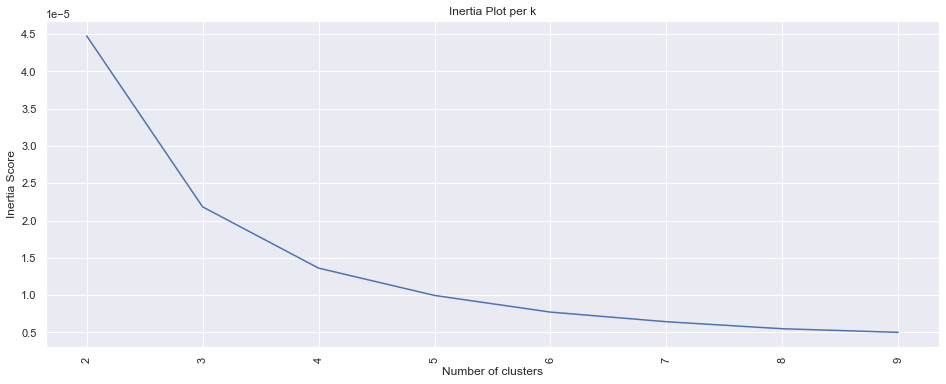

In [69]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters4))
ax1.plot(xx, inertia4)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters4, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [70]:
# Running K means on 5 clusters

kmeans4 = KMeans(n_clusters=3, random_state=2)
kmeans4 = kmeans4.fit(Xc3)


kmeans4.labels_

# "predictions" for new data
predictions4 = kmeans4.predict(Xc3)

# calculating the Counts of the cluster
unique4, counts4 = np.unique(predictions4, return_counts=True)
counts4= counts4.reshape(1,3)

# Creating a datagrame
countscldf4 = pd.DataFrame(counts4, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf4

,Cluster 0,Cluster 1,Cluster 2
0,164,261,101


Explained variance ratio (first two components): [0.98173338 0.01312358]


<Figure size 720x360 with 0 Axes>

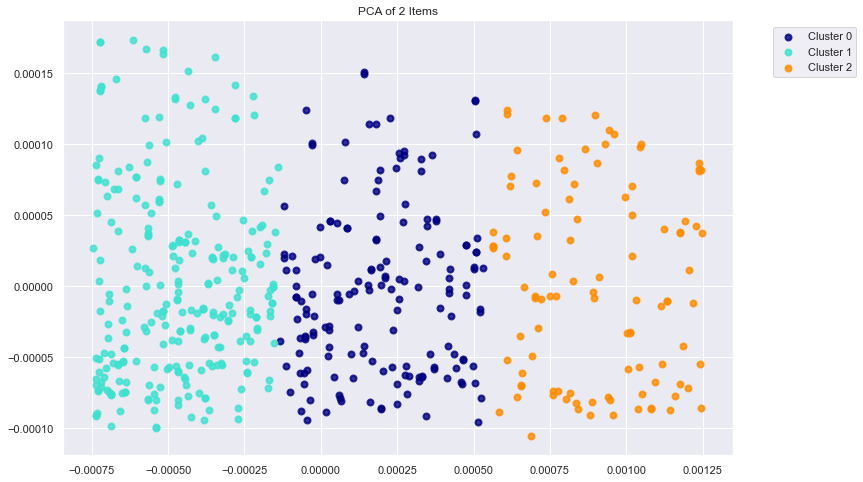

In [71]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictions4

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pca4 = PCA(n_components=2, random_state = 453)
Xc3_r = pca4.fit(Xc3).transform(Xc3)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca4.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xc3_r[y_num == i, 0], Xc3_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

Total Variance in our dataset is:  3.1862913199670363e-07
The 95% variance we want to have is:  3.026976753968684e-07

Variance explain with 2 n_compononets:  3.1699040748782287e-07
Variance explain with 3 n_compononets:  3.178912150037858e-07
Variance explain with 5 n_compononets:  3.1835450009238674e-07
Variance explain with 7 n_compononets:  3.1854364106768436e-07
Variance explain with 8 n_compononets:  3.1858273972551953e-07
Variance explain with 10 n_compononets:  3.1862139400126563e-07
Variance explain with 12 n_compononets:  3.186291105690879e-07
Variance explain with 15 n_compononets:  3.1862913199670363e-07


Text(0, 0.5, 'explained_ratio_')

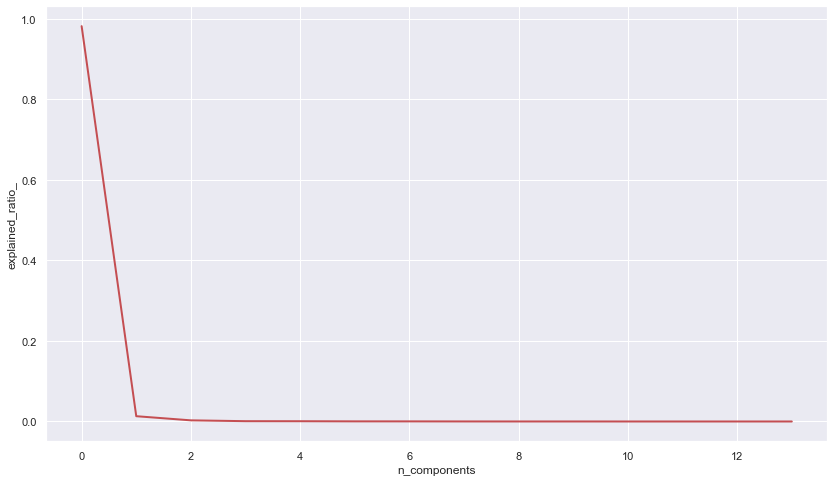

In [72]:
# Trying with Dimentionality reduction and then Kmeans

n_components4 = Xc3.shape[1]

# Running PCA with all components
pca4 = PCA(n_components=n_components2, random_state = 453)
Xc3_r = pca4.fit(Xc3).transform(Xc3)


# Calculating the 95% Variance
total_variance = sum(pca4.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components4), pca4.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 2 n_compononets: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 3 n_compononets: ", sum(a["Explained Variance"][0:3]))
print("Variance explain with 5 n_compononets: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 7 n_compononets: ", sum(a["Explained Variance"][0:7]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 n_compononets: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca4.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

The innertia for : 2 Clusters is: 4.389795688431425e-05
The innertia for : 3 Clusters is: 2.0976413104412634e-05
The innertia for : 4 Clusters is: 1.276479536214054e-05
The innertia for : 5 Clusters is: 9.108608996947721e-06
The innertia for : 6 Clusters is: 6.9124064691557776e-06
The innertia for : 7 Clusters is: 5.5553996821627655e-06
The innertia for : 8 Clusters is: 4.6447776023408976e-06
The innertia for : 9 Clusters is: 4.158547234149393e-06


Text(0.5, 1.0, 'Inertia Plot per k')

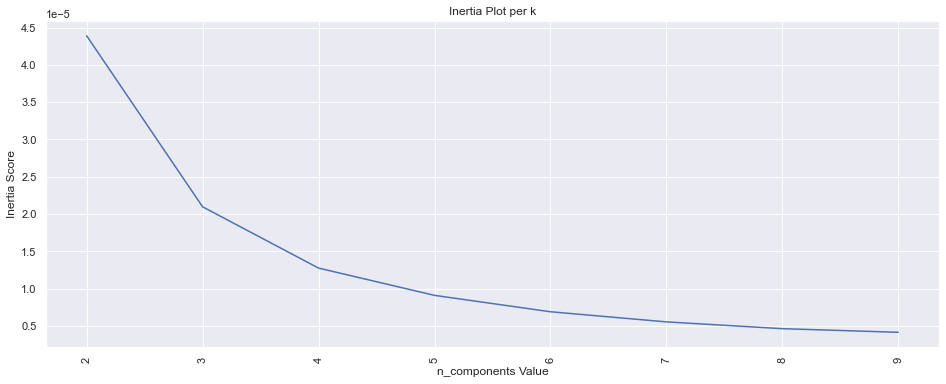

In [73]:
# Running PCA again

pca4 = PCA(n_components=2, random_state = 453)
Xc3_r = pca4.fit(Xc3).transform(Xc3)

inertia4 = []

#running Kmeans

for f in no_of_clusters4:
    kmeans4 = KMeans(n_clusters=f, random_state=2)
    kmeans4 = kmeans4.fit(Xc3_r)
    u4 = kmeans4.inertia_
    inertia4.append(u4)
    print("The innertia for :", f, "Clusters is:", u4)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters4))
ax1.plot(xx, inertia4)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters4, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [74]:
# Running K means on 5 clusters

kmeans4 = KMeans(n_clusters=3, random_state=2)
kmeans4 = kmeans4.fit(Xc3_r)


kmeans4.labels_

# "predictions" for new data
predictions4 = kmeans4.predict(Xc3_r)

# calculating the Counts of the cluster
unique4, counts4 = np.unique(predictions4, return_counts=True)
counts4 = counts4.reshape(1,3)

# Creating a datagrame
countscldf4 = pd.DataFrame(counts4, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldf4

,Cluster 0,Cluster 1,Cluster 2
0,261,164,101


In [75]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters4 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouette4 = []


for f in no_of_clusters4:
    kmeans4 = KMeans(n_clusters=f, random_state=2)
    kmeans4 = kmeans4.fit(Xc3_r)
    lab4= kmeans4.labels_
    u4= metrics.silhouette_score(Xc3_r, lab4, metric='euclidean')
    silhouette4.append(u4)
    print("The silho for :", f, "Clusters is:", u4)

The silho for : 2 Clusters is: 0.6236605633824526
The silho for : 3 Clusters is: 0.5737844737503096
The silho for : 4 Clusters is: 0.5197865894477887
The silho for : 5 Clusters is: 0.49190758551804525
The silho for : 6 Clusters is: 0.45896156992498804
The silho for : 7 Clusters is: 0.4453938954938484
The silho for : 8 Clusters is: 0.4344611513793694
The silho for : 9 Clusters is: 0.41642240832208727


In [76]:
dfC3['ClustersC3'] = predictions4

<ipython-input-76-292243ddf62e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC3['ClustersC3'] = predictions4


In [77]:
BondInvestments=pd.Series(df1.BondInvestments)
EquityInvestments=pd.Series(df1.EquityInvestments)
MoneyMarketInvestments= pd.Series(df1.MoneyMarketInvestments)
OtherInvestments= pd.Series(df1.OtherInvestments)
Cash=pd.Series(df1.Cash)
Provincia=pd.Series(df1.Provincia)
Regione= pd.Series(df1.Regione)
ClientID= pd.Series(df1.ClientID)

In [78]:
df['BondInvestments']= BondInvestments
df['EquityInvestments']= EquityInvestments
df['MoneyMarketInvestments']= MoneyMarketInvestments
df['OtherInvestments']= OtherInvestments
df['Cash']= Cash
df['Provincia']= Provincia
df['Regione']= Regione
df['ClientID']= ClientID

dfC0['BondInvestments']= BondInvestments
dfC0['EquityInvestments']= EquityInvestments
dfC0['MoneyMarketInvestments']= MoneyMarketInvestments
dfC0['OtherInvestments']= OtherInvestments
dfC0['Cash']= Cash
dfC0['Provincia']= Provincia
dfC0['Regione']= Regione
dfC0['ClientID']= ClientID

dfC1['BondInvestments']= BondInvestments
dfC1['EquityInvestments']= EquityInvestments
dfC1['MoneyMarketInvestments']= MoneyMarketInvestments
dfC1['OtherInvestments']= OtherInvestments
dfC1['Cash']= Cash
dfC1['Provincia']= Provincia
dfC1['Regione']= Regione
dfC1['ClientID']= ClientID

dfC2['BondInvestments']= BondInvestments
dfC2['EquityInvestments']= EquityInvestments
dfC2['MoneyMarketInvestments']= MoneyMarketInvestments
dfC2['OtherInvestments']= OtherInvestments
dfC2['Cash']= Cash
dfC2['Provincia']= Provincia
dfC2['Regione']= Regione
dfC2['ClientID']= ClientID

dfC3['BondInvestments']= BondInvestments
dfC3['EquityInvestments']= EquityInvestments
dfC3['MoneyMarketInvestments']= MoneyMarketInvestments
dfC3['OtherInvestments']= OtherInvestments
dfC3['Cash']= Cash
dfC3['Provincia']= Provincia
dfC3['Regione']= Regione
dfC3['ClientID']= ClientID

<ipython-input-78-5e0bd88f4caa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC0['BondInvestments']= BondInvestments
<ipython-input-78-5e0bd88f4caa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfC0['EquityInvestments']= EquityInvestments
<ipython-input-78-5e0bd88f4caa>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [79]:
dfC0.head()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,...,Clusters,ClustersC0,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,ClientID
0,0.597553,0.088,0.285714,0.148466,1,13719,22,0.079215,0.797512,0.204401,...,0,2,0.5730,0.4270,0.0000,0.0,0.0000,Palermo,Sicilia,Client1
2,0.431233,0.076,0.714286,0.574847,1,42348,52,0.296850,0.143672,0.161196,...,0,0,0.3897,0.5373,0.0241,0.0,0.0236,Palermo,Sicilia,Client652
5,0.472080,0.123,0.523810,0.235583,0,39265,68,0.368614,0.245857,0.185460,...,0,2,0.5240,0.4760,0.0000,0.0,0.0000,Palermo,Sicilia,Client788
11,0.597553,0.088,0.285714,0.148466,1,13719,22,0.122575,0.757040,0.218559,...,0,2,0.5730,0.4270,0.0000,0.0,0.0000,Palermo,Sicilia,Client1943
19,0.519000,0.046,0.714286,0.414110,1,33217,36,0.231088,0.894141,0.246103,...,0,0,0.8487,0.1345,0.0033,0.0,0.0135,Palermo,Sicilia,Client3096


In [80]:
dfC0.rename(columns={'ClustersC0':'Subclusters'}, inplace=True)
dfC1.rename(columns={'ClustersC1':'Subclusters'}, inplace=True)
dfC2.rename(columns={'ClustersC2':'Subclusters'}, inplace=True)
dfC3.rename(columns={'ClustersC3':'Subclusters'}, inplace=True)
df_sub = pd.concat([dfC0, dfC1, dfC2, dfC3])

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [81]:
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,...,Clusters,Subclusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,ClientID
0,0.597553,0.088,0.285714,0.148466,1,13719,22,0.079215,0.797512,0.204401,...,0,2,0.5730,0.4270,0.0000,0.0,0.0000,Palermo,Sicilia,Client1
2,0.431233,0.076,0.714286,0.574847,1,42348,52,0.296850,0.143672,0.161196,...,0,0,0.3897,0.5373,0.0241,0.0,0.0236,Palermo,Sicilia,Client652
5,0.472080,0.123,0.523810,0.235583,0,39265,68,0.368614,0.245857,0.185460,...,0,2,0.5240,0.4760,0.0000,0.0,0.0000,Palermo,Sicilia,Client788
11,0.597553,0.088,0.285714,0.148466,1,13719,22,0.122575,0.757040,0.218559,...,0,2,0.5730,0.4270,0.0000,0.0,0.0000,Palermo,Sicilia,Client1943
19,0.519000,0.046,0.714286,0.414110,1,33217,36,0.231088,0.894141,0.246103,...,0,0,0.8487,0.1345,0.0033,0.0,0.0135,Palermo,Sicilia,Client3096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,0.365875,0.032,0.523810,0.565031,0,16428,56,0.335436,0.775246,0.298646,...,3,1,0.8671,0.1029,0.0000,0.0,0.0300,Rovigo,Veneto,Client3356
4639,0.315187,0.000,0.809524,0.528221,1,31063,71,0.344378,0.294268,0.361040,...,3,0,0.0000,0.0000,0.0000,0.0,0.0000,Lecce,Puglia,Client4914
4643,0.488659,0.070,0.619048,0.179755,1,15480,50,0.237150,0.152685,0.193997,...,3,1,0.6497,0.3437,0.0000,0.0,0.0066,Sassari,Sardegna,Client1547
4644,0.488659,0.070,0.619048,0.179755,1,15480,50,0.200831,0.218333,0.240478,...,3,1,0.6497,0.3437,0.0000,0.0,0.0066,Sassari,Sardegna,Client1559


In [82]:
df_sub.groupby(['Clusters', 'Subclusters']).ClientID.count()

Clusters  Subclusters
0         0               540
          1               322
          2               414
1         0                68
          1                27
          2                67
2         0              1065
          1               825
          2               692
3         0               261
          1               164
          2               101
Name: ClientID, dtype: int64

In [83]:
df_sub.groupby(['Clusters']).mean()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,NoTrustInBanks,Subclusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
Clusters,,,,,,,,,,,,,,,,,,,
0,0.511439,0.048165,0.558628,0.194843,0.481975,35100.493730,50.024295,0.252534,0.510690,0.399247,0.451913,0.405287,0.022727,0.901254,0.490178,0.222530,0.040669,0.035144,0.203190
1,0.362513,0.038340,0.561141,0.170518,0.444444,11817.487654,64.580247,0.323726,0.368132,0.326773,0.385485,0.492219,0.000000,0.993827,0.423940,0.209742,0.110119,0.027107,0.229099
2,0.494717,0.049362,0.663642,0.294687,0.524400,206761.775755,55.493416,0.374777,0.467461,0.368206,0.405635,0.523394,0.185515,0.855538,0.519697,0.237775,0.045378,0.048507,0.142681
3,0.456788,0.044190,0.544994,0.177778,0.507605,18528.749049,54.766160,0.276270,0.465201,0.369308,0.442611,0.428997,0.000000,0.695817,0.441000,0.238660,0.058627,0.030381,0.214678


In [84]:
df_sub['BondAbsolute'] = df_sub['BondInvestments'] * df_sub['AuM']
df_sub['EquityAbsolute'] = df_sub['EquityInvestments'] * df_sub['AuM']
df_sub['MoneyAbsolute'] = df_sub['MoneyMarketInvestments'] * df_sub['AuM']
df_sub['OtherAbsolute'] = df_sub['OtherInvestments'] * df_sub['AuM']
df_sub['CashAbsolute'] = df_sub['Cash'] * df_sub['AuM']
df_sub.groupby(['Clusters', 'Subclusters']).mean()

RiskPropension  PortfolioRisk  \
Clusters Subclusters                                  
0        0                  0.522087       0.045394   
         1                  0.503314       0.045273   
         2                  0.503870       0.054027   
1        0                  0.344089       0.035221   
         1                  0.298806       0.030407   
         2                  0.406886       0.044701   
2        0                  0.495351       0.051495   
         1                  0.488254       0.048978   
         2                  0.501444       0.046536   
3        0                  0.484326       0.047019   
         1                  0.442449       0.042177   
         2                  0.408907       0.040149   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters Subclusters                                                    
0        0                             0.567637              0.199104   
         1                             0.549246              0.182875   
         2                             0.554175              0.198594   
1        0                             0.559524              0.147411   
         1                             0.552028              0.150489   
         2                             0.566453              0.202042   
2        0                             0.722334              0.361970   
         1                             0.643059              0.266914   
         2                             0.597853              0.224248   
3        0                             0.539318              0.175246   
         1                             0.551684              0.184464   
         2                             0.548798              0.173462   

                           Sex            AuM        Age  IncomeNeed  \
Clusters Subclusters                                                   
0        0            0.448148   43401.750000  49.677778    0.252199   
         1            0.524845   24799.388199  50.322981    0.250561   
         2            0.492754   32284.739130  50.243961    0.254505   
1        0            0.323529   11623.029412  66.647059    0.330918   
         1            0.296296   10587.185185  74.370370    0.380048   
         2            0.626866   12510.641791  58.537313    0.293730   
2        0            0.542723  363780.425352  56.614085    0.507351   
         1            0.523636  119517.650909  55.695758    0.288525   
         2            0.497110   69119.494220  53.527457    0.273573   
3        0            0.490421   20265.938697  51.429119    0.257350   
         1            0.524390   17651.774390  56.512195    0.289087   
         2            0.524752   15463.574257  60.554455    0.304349   

                      LongTermCareNeed  ProtectionNeed  ...  BondInvestments  \
Clusters Subclusters                                    ...                    
0        0                    0.515918        0.405032  ...         0.520316   
         1                    0.524101        0.396684  ...         0.463336   
         2                    0.493439        0.393693  ...         0.471745   
1        0                    0.371884        0.314429  ...         0.417679   
         1                    0.334479        0.429242  ...         0.610700   
         2                    0.377885        0.298007  ...         0.355033   
2        0                    0.461029        0.351062  ...         0.535969   
         1                    0.458854        0.374903  ...         0.523760   
         2                    0.487622        0.386608  ...         0.489810   
3        0                    0.508836        0.374224  ...         0.426467   
         1                    0.449564        0.378951  ...         0.461799   
         2                    0.377832        0.340945  ...         0.444783   

                      EquityInvestments  MoneyMarketInvestments  \
Clusters Subclusters           

## Adesso cluster solo con gli investimenti

In [85]:
df.head()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,...,NoTrustInBanks,Clusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,ClientID
0,0.597553,0.088,0.285714,0.148466,1,13719,22,0.079215,0.797512,0.204401,...,0,0,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,Client1
1,0.429550,0.070,0.809524,0.269939,0,101134,54,0.346486,0.124244,0.216927,...,0,2,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,Client19
2,0.431233,0.076,0.714286,0.574847,1,42348,52,0.296850,0.143672,0.161196,...,0,0,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,Client652
3,0.414649,0.029,0.809524,0.362577,1,479278,57,0.630393,0.742026,0.234112,...,0,2,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,Client671
4,0.337011,0.090,0.809524,0.433129,1,93642,69,0.401974,0.228357,0.243846,...,1,2,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,Client762


In [86]:
inv=df[['BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']]

In [87]:
inv['BondMoney']= inv['BondInvestments'] + inv['MoneyMarketInvestments'] 

<ipython-input-87-affa6ae64c22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv['BondMoney']= inv['BondInvestments'] + inv['MoneyMarketInvestments']


In [88]:
inv=inv.drop(columns=['BondInvestments','MoneyMarketInvestments','OtherInvestments'])

In [89]:
inv.head()

,EquityInvestments,Cash,BondMoney
0,0.4270,0.0000,0.5730
1,0.3393,0.1940,0.4667
2,0.5373,0.0236,0.4138
3,0.1040,0.0004,0.7686
4,0.3299,0.0409,0.6292


In [90]:
I=inv.values

In [91]:
I = preprocessing.normalize(I)

In [92]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI = range(2,10) #[2,3,4,5,6,7,8,9]
silhouetteI = []


for f in no_of_clustersI:
    kmeansI = KMeans(n_clusters=f, random_state=2)
    kmeansI = kmeansI.fit(I)
    labI= kmeansI.labels_
    uI = metrics.silhouette_score(I, labI, metric='euclidean')
    silhouetteI.append(uI)
    print("The silho for :", f, "Clusters is:", uI)

The silho for : 2 Clusters is: 0.6390962300844706
The silho for : 3 Clusters is: 0.5467454124147454
The silho for : 4 Clusters is: 0.4714440646310041
The silho for : 5 Clusters is: 0.5047536205376161
The silho for : 6 Clusters is: 0.4803488159746859
The silho for : 7 Clusters is: 0.4859707360885843
The silho for : 8 Clusters is: 0.46969224836585444
The silho for : 9 Clusters is: 0.47720285973968685


In [93]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI = range(2,10) #[2,3,4,5,6,7,8,9]
inertiaI = []


for f in no_of_clustersI:
    kmeansI = KMeans(n_clusters=f, random_state=2)
    kmeansI = kmeansI.fit(I)
    vI = kmeansI.inertia_
    inertiaI.append(vI)
    print("The innertia for :", f, "Clusters is:", vI)

The innertia for : 2 Clusters is: 591.7188707337616
The innertia for : 3 Clusters is: 303.00841250860447
The innertia for : 4 Clusters is: 230.94420182273785
The innertia for : 5 Clusters is: 166.67177537359788
The innertia for : 6 Clusters is: 135.98204130263034
The innertia for : 7 Clusters is: 116.14889063925429
The innertia for : 8 Clusters is: 99.31721634070149
The innertia for : 9 Clusters is: 83.21884103362044


Text(0.5, 1.0, 'Inertia Plot per k')

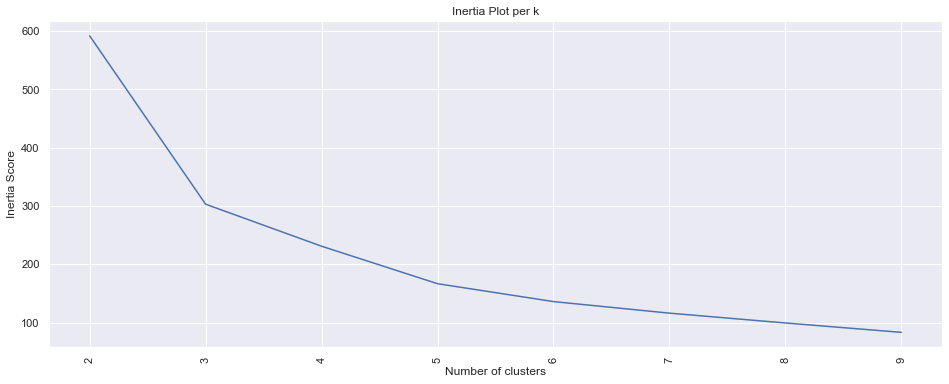

In [94]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersI))
ax1.plot(xx, inertiaI)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersI, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [95]:
# Running K means on 5 clusters

kmeansI = KMeans(n_clusters=3, random_state=2)
kmeansI = kmeansI.fit(I)


kmeansI.labels_

# "predictions" for new data
predictionsI = kmeansI.predict(I)

# calculating the Counts of the cluster
uniqueI, countsI = np.unique(predictionsI, return_counts=True)
countsI= countsI.reshape(1,3)

# Creating a datagrame
countscldfI = pd.DataFrame(countsI, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldfI

,Cluster 0,Cluster 1,Cluster 2
0,1263,2611,672


Explained variance ratio (first two components): [0.65036691 0.31257413]


<Figure size 720x360 with 0 Axes>

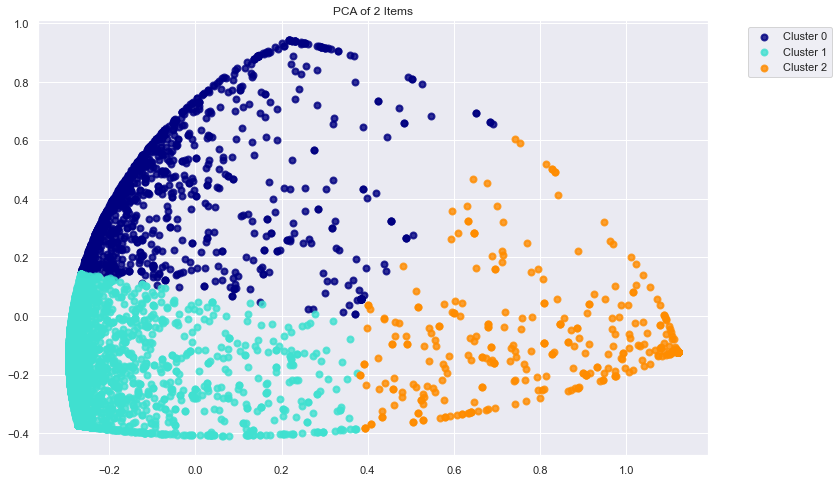

In [96]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictionsI

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pcaI = PCA(n_components=2, random_state = 453)
I_r = pcaI.fit(I).transform(I)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pcaI.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(I_r[y_num == i, 0], I_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [97]:
inv['ClustersInv'] = predictionsI

In [98]:
Inv0=inv.loc[inv['ClustersInv'] == 0]
Inv1=inv.loc[inv['ClustersInv'] == 1]
Inv2=inv.loc[inv['ClustersInv'] == 2]

In [99]:
Ic0= Inv0.values
Ic1= Inv1.values
Ic2= Inv2.values

In [100]:
Ic0 = preprocessing.normalize(Ic0)
Ic1 = preprocessing.normalize(Ic1)
Ic2 = preprocessing.normalize(Ic2)

## primo cluster inv

In [101]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI0 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouetteI0 = []


for f in no_of_clustersI0:
    kmeansI0 = KMeans(n_clusters=f, random_state=2)
    kmeansI0 = kmeansI0.fit(Ic0)
    labI0= kmeansI0.labels_
    uI0 = metrics.silhouette_score(Ic0, labI0, metric='euclidean')
    silhouetteI0.append(uI0)
    print("The silho for :", f, "Clusters is:", uI0)

The silho for : 2 Clusters is: 0.5306272343487537
The silho for : 3 Clusters is: 0.5392246874081709
The silho for : 4 Clusters is: 0.49245285122388127
The silho for : 5 Clusters is: 0.5268688288250496
The silho for : 6 Clusters is: 0.47456418672207473
The silho for : 7 Clusters is: 0.47925697729204425
The silho for : 8 Clusters is: 0.4866669531275999
The silho for : 9 Clusters is: 0.4475602205247452


In [102]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI0 = range(2,10) #[2,3,4,5,6,7,8,9]
inertiaI0 = []


for f in no_of_clustersI0:
    kmeansI0 = KMeans(n_clusters=f, random_state=2)
    kmeansI0 = kmeansI0.fit(Ic0)
    vI0 = kmeansI0.inertia_
    inertiaI0.append(vI0)
    print("The innertia for :", f, "Clusters is:", vI0)

The innertia for : 2 Clusters is: 72.68462899895447
The innertia for : 3 Clusters is: 52.90414541572282
The innertia for : 4 Clusters is: 36.71863278057281
The innertia for : 5 Clusters is: 21.045178606358586
The innertia for : 6 Clusters is: 17.171624597177445
The innertia for : 7 Clusters is: 14.186298499367666
The innertia for : 8 Clusters is: 11.938474945406858
The innertia for : 9 Clusters is: 10.030814195680868


Text(0.5, 1.0, 'Inertia Plot per k')

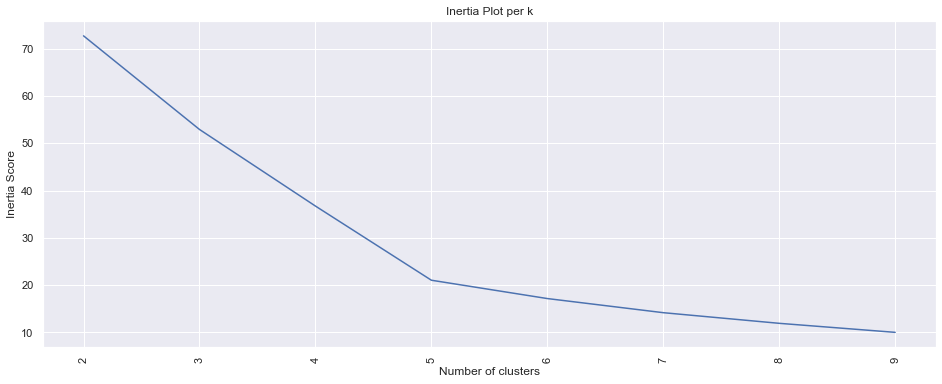

In [103]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersI0))
ax1.plot(xx, inertiaI0)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersI0, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [104]:
# Running K means on 5 clusters

kmeansI0 = KMeans(n_clusters=3, random_state=2)
kmeansI0 = kmeansI0.fit(Ic0)


kmeansI0.labels_

# "predictions" for new data
predictionsI0 = kmeansI0.predict(Ic0)

# calculating the Counts of the cluster
uniqueI0, countsI0 = np.unique(predictionsI0, return_counts=True)
countsI0= countsI0.reshape(1,3)

# Creating a datagrame
countscldfI0 = pd.DataFrame(countsI0, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldfI0

,Cluster 0,Cluster 1,Cluster 2
0,121,899,243


Explained variance ratio (first two components): [0.62751792 0.237136  ]


<Figure size 720x360 with 0 Axes>

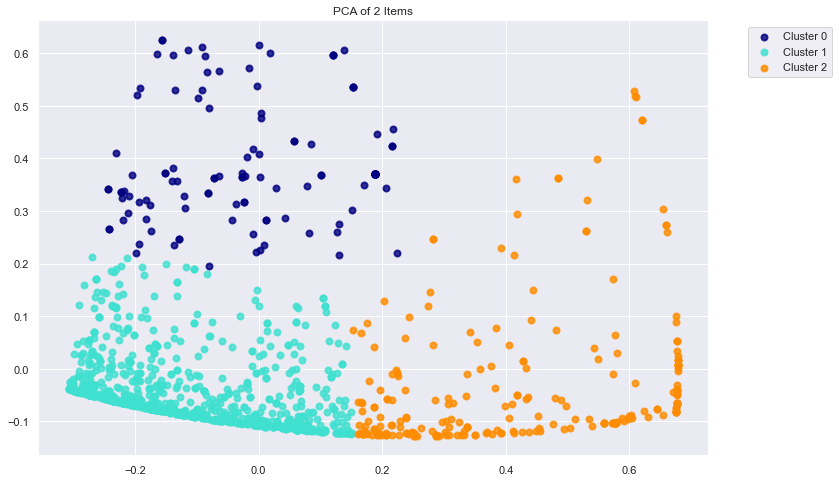

In [105]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictionsI0

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pcaI0 = PCA(n_components=2, random_state = 453)
I0_r = pcaI0.fit(Ic0).transform(Ic0)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pcaI0.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(I0_r[y_num == i, 0], I0_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

## secondo cluster inv

In [106]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI1 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouetteI1 = []


for f in no_of_clustersI1:
    kmeansI1 = KMeans(n_clusters=f, random_state=2)
    kmeansI1 = kmeansI1.fit(Ic1)
    labI1= kmeansI1.labels_
    uI1 = metrics.silhouette_score(Ic1, labI1, metric='euclidean')
    silhouetteI1.append(uI1)
    print("The silho for :", f, "Clusters is:", uI1)

The silho for : 2 Clusters is: 0.39186729803826537
The silho for : 3 Clusters is: 0.45474650174090525
The silho for : 4 Clusters is: 0.39153993301642803
The silho for : 5 Clusters is: 0.4045021999561078
The silho for : 6 Clusters is: 0.4088377654095849
The silho for : 7 Clusters is: 0.4072280181589001
The silho for : 8 Clusters is: 0.3717408275149408
The silho for : 9 Clusters is: 0.38746656607794083


In [107]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI1 = range(2,10) #[2,3,4,5,6,7,8,9]
inertiaI1 = []


for f in no_of_clustersI1:
    kmeansI1 = KMeans(n_clusters=f, random_state=2)
    kmeansI1 = kmeansI1.fit(Ic1)
    vI1 = kmeansI1.inertia_
    inertiaI1.append(vI1)
    print("The innertia for :", f, "Clusters is:", vI1)

The innertia for : 2 Clusters is: 34.662002750003005
The innertia for : 3 Clusters is: 21.20817450680338
The innertia for : 4 Clusters is: 16.503450165660414
The innertia for : 5 Clusters is: 13.918157771966133
The innertia for : 6 Clusters is: 12.037164945293853
The innertia for : 7 Clusters is: 10.411650490418214
The innertia for : 8 Clusters is: 9.08892733338625
The innertia for : 9 Clusters is: 8.062088139968028


Text(0.5, 1.0, 'Inertia Plot per k')

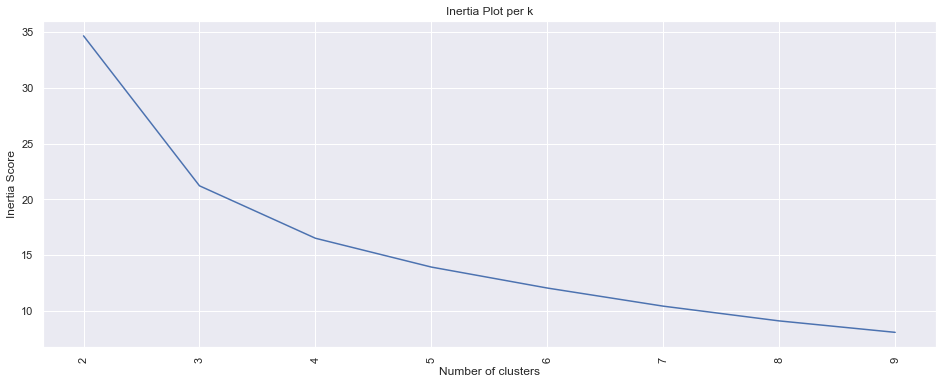

In [108]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersI1))
ax1.plot(xx, inertiaI1)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersI1, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [109]:
# Running K means on 5 clusters

kmeansI1 = KMeans(n_clusters=3, random_state=2)
kmeansI1 = kmeansI1.fit(Ic1)


kmeansI1.labels_

# "predictions" for new data
predictionsI1 = kmeansI1.predict(Ic1)

# calculating the Counts of the cluster
uniqueI1, countsI1 = np.unique(predictionsI1, return_counts=True)
countsI1= countsI1.reshape(1,3)

# Creating a datagrame
countscldfI1 = pd.DataFrame(countsI1, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldfI1

,Cluster 0,Cluster 1,Cluster 2
0,1250,1023,338


Explained variance ratio (first two components): [0.58694388 0.33512545]


<Figure size 720x360 with 0 Axes>

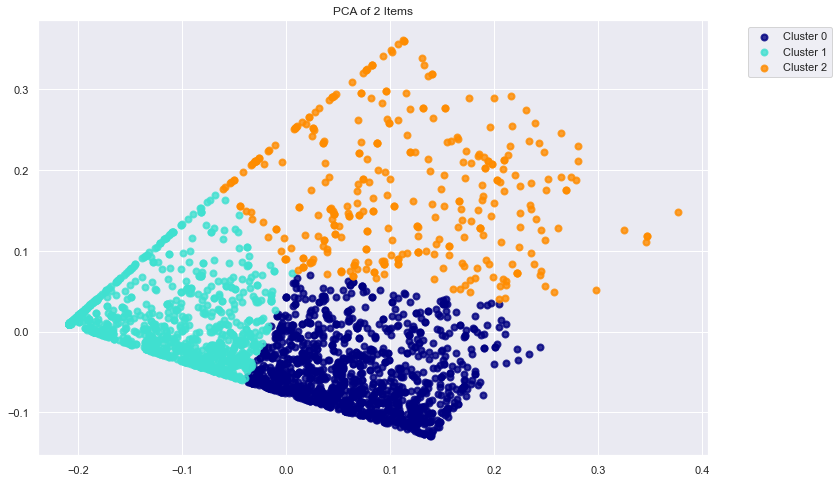

In [110]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictionsI1

target_names = ["Cluster 0","Cluster 1","Cluster 2"]

pcaI1 = PCA(n_components=2, random_state = 453)
I1_r = pcaI1.fit(Ic1).transform(Ic1)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pcaI1.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(I1_r[y_num == i, 0], I1_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

## terzo cluster inv

In [111]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI2 = range(2,10) #[2,3,4,5,6,7,8,9]
silhouetteI2 = []


for f in no_of_clustersI2:
    kmeansI2 = KMeans(n_clusters=f, random_state=2)
    kmeansI2 = kmeansI2.fit(Ic2)
    labI2= kmeansI2.labels_
    uI2 = metrics.silhouette_score(Ic2, labI2, metric='euclidean')
    silhouetteI2.append(uI2)
    print("The silho for :", f, "Clusters is:", uI2)

The silho for : 2 Clusters is: 0.7404364396485849
The silho for : 3 Clusters is: 0.7042636478225734
The silho for : 4 Clusters is: 0.7174090973702606
The silho for : 5 Clusters is: 0.7275844403036967
The silho for : 6 Clusters is: 0.7082451234451393
The silho for : 7 Clusters is: 0.7021986541942438
The silho for : 8 Clusters is: 0.7161422701158093
The silho for : 9 Clusters is: 0.7224000291963895


In [112]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clustersI2 = range(2,10) #[2,3,4,5,6,7,8,9]
inertiaI2 = []


for f in no_of_clustersI2:
    kmeansI2 = KMeans(n_clusters=f, random_state=2)
    kmeansI2 = kmeansI2.fit(Ic2)
    vI2 = kmeansI2.inertia_
    inertiaI2.append(vI2)
    print("The innertia for :", f, "Clusters is:", vI2)

The innertia for : 2 Clusters is: 2.870906718979834
The innertia for : 3 Clusters is: 2.0462917545371906
The innertia for : 4 Clusters is: 1.3959058641720719
The innertia for : 5 Clusters is: 1.046821253918916
The innertia for : 6 Clusters is: 0.8315446363182842
The innertia for : 7 Clusters is: 0.6852868461786948
The innertia for : 8 Clusters is: 0.5704357349984188
The innertia for : 9 Clusters is: 0.49796931404634903


Text(0.5, 1.0, 'Inertia Plot per k')

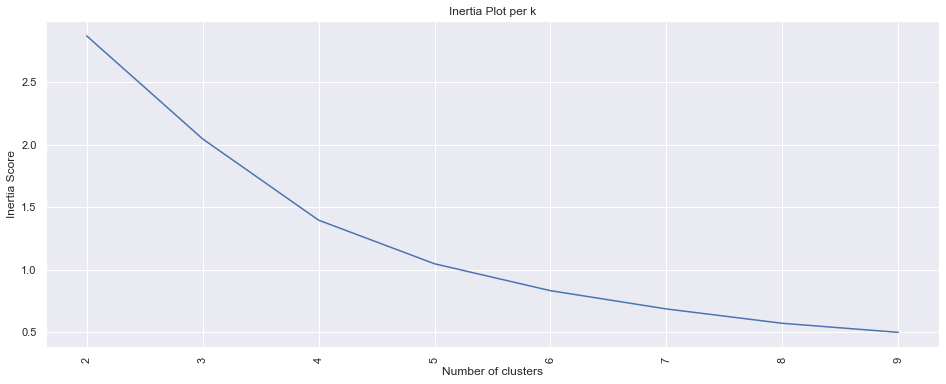

In [113]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clustersI2))
ax1.plot(xx, inertiaI2)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clustersI2, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [114]:
# Running K means on 5 clusters

kmeansI2 = KMeans(n_clusters=4, random_state=2)
kmeansI2 = kmeansI2.fit(Ic2)


kmeansI2.labels_

# "predictions" for new data
predictionsI2 = kmeansI2.predict(Ic2)

# calculating the Counts of the cluster
uniqueI2, countsI2 = np.unique(predictionsI2, return_counts=True)
countsI2= countsI2.reshape(1,4)

# Creating a datagrame
countscldfI2 = pd.DataFrame(countsI2, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldfI2

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,402,90,45,135


Explained variance ratio (first two components): [0.84453579 0.11954029]


<Figure size 720x360 with 0 Axes>

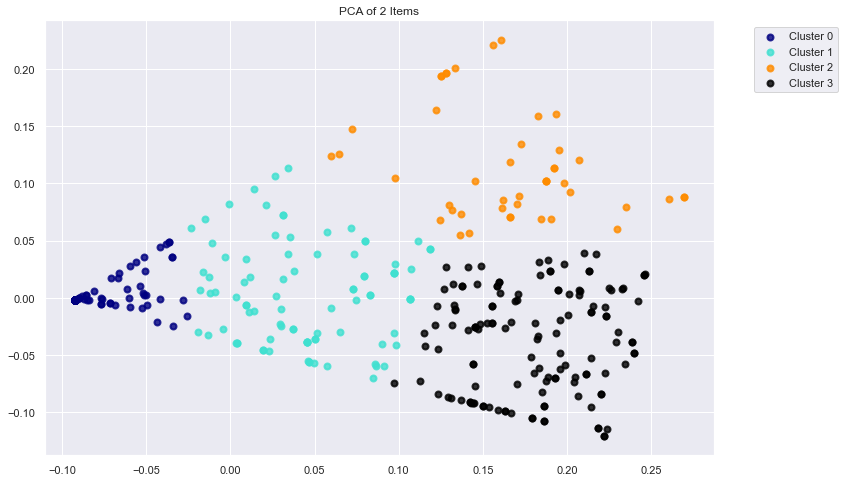

In [115]:
# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


y_num = predictionsI2

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pcaI2 = PCA(n_components=2, random_state = 453)
I2_r = pcaI2.fit(Ic2).transform(Ic2)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pcaI2.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange','black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2,3], target_names):
    plt.scatter(I2_r[y_num == i, 0], I2_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()

In [116]:
Inv0['ClientID']= ClientID
Inv1['ClientID']= ClientID
Inv2['ClientID']= ClientID

Inv0['SubInv0']= predictionsI0
Inv1['SubInv1']= predictionsI1
Inv2['SubInv2']= predictionsI2

<ipython-input-116-d39e3c5b0897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv0['ClientID']= ClientID
<ipython-input-116-d39e3c5b0897>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv1['ClientID']= ClientID
<ipython-input-116-d39e3c5b0897>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [117]:
Inv0.rename(columns={'SubInv0':'SubClustersInv'}, inplace=True)
Inv1.rename(columns={'SubInv1':'SubClustersInv'}, inplace=True)
Inv2.rename(columns={'SubInv2':'SubClustersInv'}, inplace=True)
Inv_sub = pd.concat([Inv0, Inv1, Inv2])

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [118]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).ClientID.count()

ClustersInv  SubClustersInv
0            0                  121
             1                  899
             2                  243
1            0                 1250
             1                 1023
             2                  338
2            0                  402
             1                   90
             2                   45
             3                  135
Name: ClientID, dtype: int64

In [119]:
Inv_sub.groupby(['ClustersInv']).mean()

,EquityInvestments,Cash,BondMoney,SubClustersInv
ClustersInv,,,,
0,0.478415,0.053088,0.402587,1.096595
1,0.159250,0.059259,0.731357,0.650709
2,0.055587,0.827279,0.100695,0.870536


In [120]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).mean()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.279306  0.226817   0.295991
            1                        0.441741  0.027550   0.475828
            2                        0.713240  0.061063   0.184701
1           0                        0.244841  0.030440   0.663340
            1                        0.072589  0.031038   0.872138
            2                        0.105010  0.251255   0.556807
2           0                        0.004188  0.993011   0.002674
            1                        0.092261  0.741499   0.153494
            2                        0.299036  0.454562   0.105173
            3                        0.103041  0.515191   0.355890

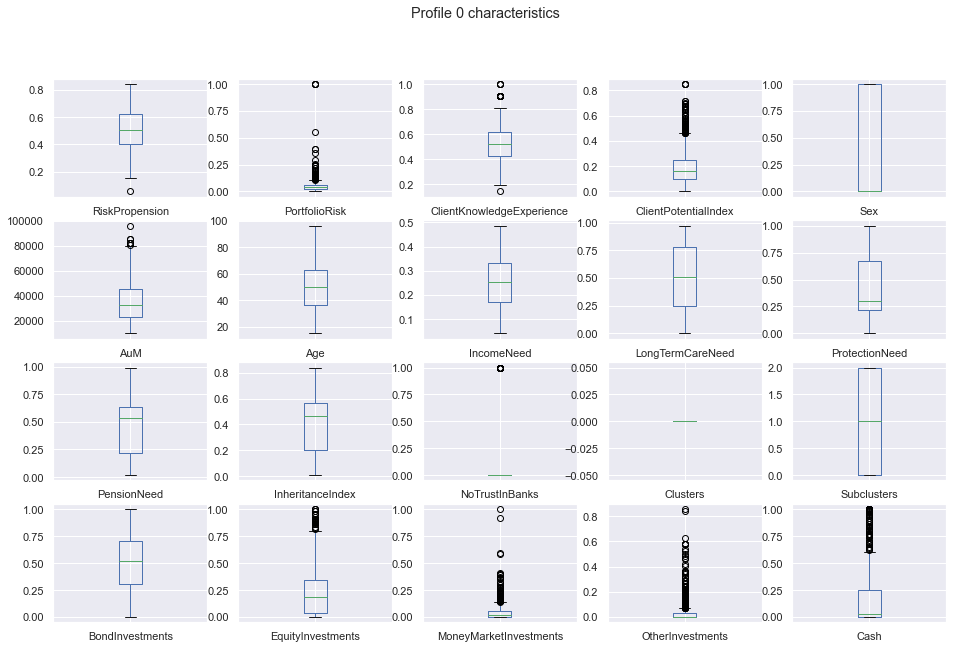

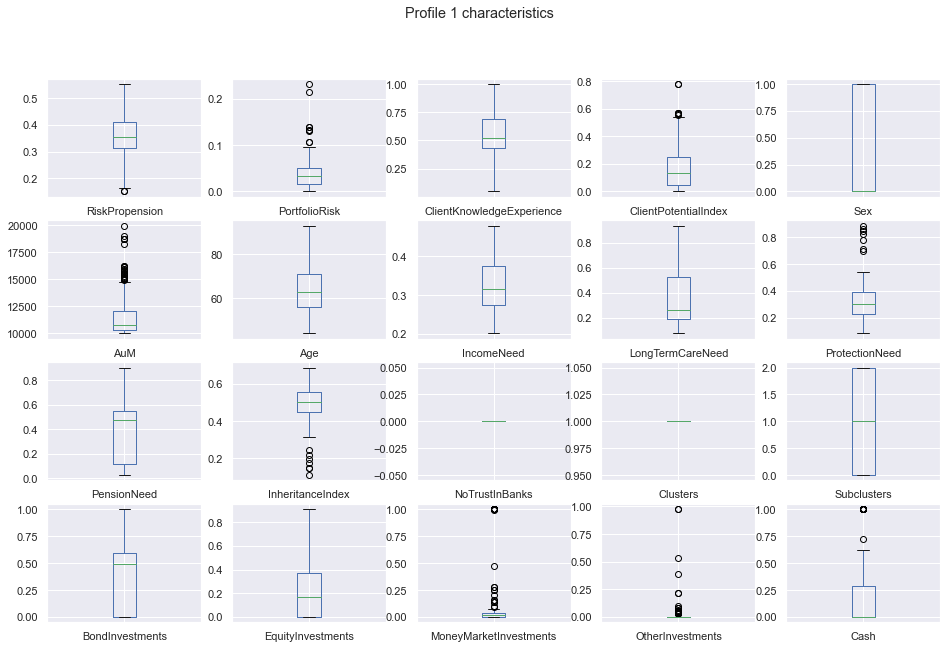

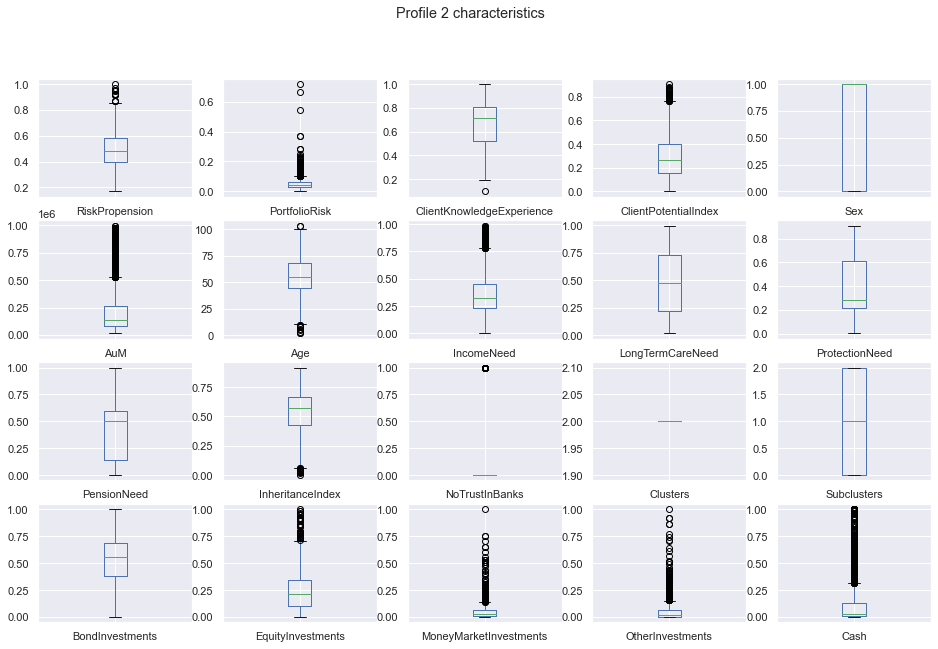

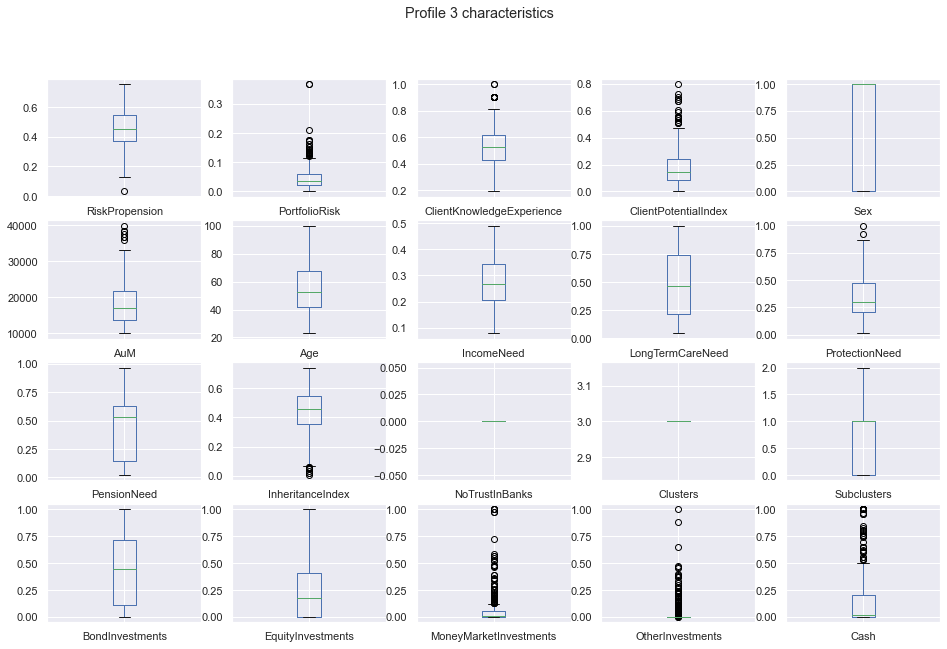

In [121]:
# we are interested in discovering the differences between full clusters

dfC0.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 0 characteristics');

dfC1.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 1 characteristics');

dfC2.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 2 characteristics');

dfC3.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 3 characteristics');

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


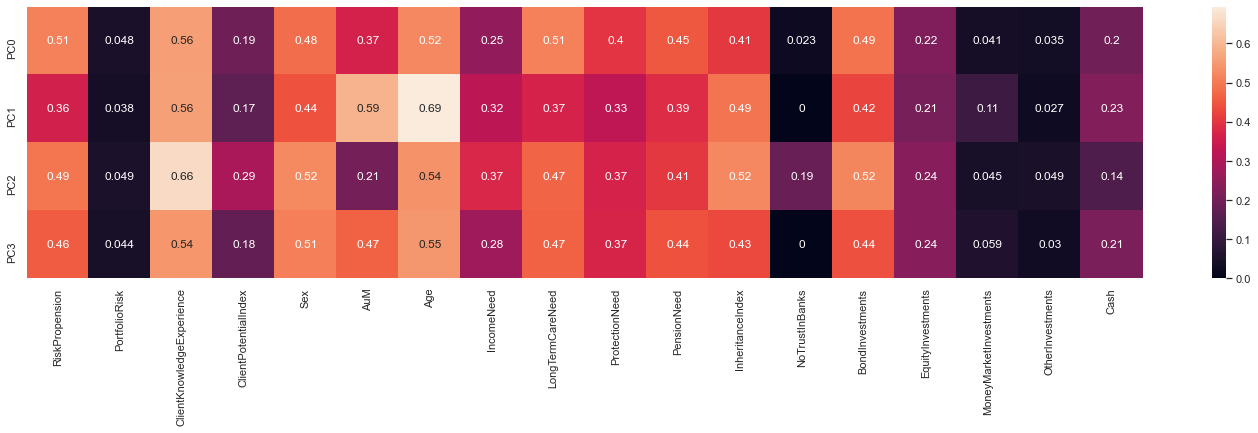

In [122]:
# AuM and Age aren't normalized, many attributes aren't numeric, I'll use the subsets so the whole df stays as it was
dfC0.AuM = dfC0.AuM / max(dfC0.AuM)
dfC0.Age = dfC0.Age / max(dfC0.Age)
dfC0.drop(columns=['Clusters', 'Subclusters', 'Provincia', 'Regione', 'ClientID'], inplace=True)

dfC1.AuM = dfC1.AuM / max(dfC1.AuM)
dfC1.Age = dfC1.Age / max(dfC1.Age)
dfC1.drop(columns=['Clusters', 'Subclusters', 'Provincia', 'Regione', 'ClientID'], inplace=True)

dfC2.AuM = dfC2.AuM / max(dfC2.AuM)
dfC2.Age = dfC2.Age / max(dfC2.Age)
dfC2.drop(columns=['Clusters', 'Subclusters', 'Provincia', 'Regione', 'ClientID'], inplace=True)

dfC3.AuM = dfC3.AuM / max(dfC3.AuM)
dfC3.Age = dfC3.Age / max(dfC3.Age)
dfC3.drop(columns=['Clusters', 'Subclusters', 'Provincia', 'Regione', 'ClientID'], inplace=True)

averages = np.zeros(shape=(4,18))
dfs = [dfC0, dfC1, dfC2, dfC3]
for i in range(4):
    for j in range(18):
        averages[i, j] = dfs[i].values[:, j].mean()
averages = pd.DataFrame(data=averages, index=['PC0', 'PC1', 'PC2', 'PC3'], columns=dfC0.columns)

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(averages, annot=True, ax=ax)

In [130]:
df_sub.columns

Index(['RiskPropension', 'PortfolioRisk', 'ClientKnowledgeExperience',
       'ClientPotentialIndex', 'Sex', 'AuM', 'Age', 'IncomeNeed',
       'LongTermCareNeed', 'ProtectionNeed', 'PensionNeed', 'InheritanceIndex',
       'NoTrustInBanks', 'Clusters', 'Subclusters', 'BondInvestments',
       'EquityInvestments', 'MoneyMarketInvestments', 'OtherInvestments',
       'Cash', 'Provincia', 'Regione', 'ClientID', 'BondAbsolute',
       'EquityAbsolute', 'MoneyAbsolute', 'OtherAbsolute', 'CashAbsolute'],
      dtype='object')

In [131]:
tab = df_sub.reset_index().groupby(['Clusters', 'Subclusters']).count().unstack()['ClientID']
tab

Subclusters,0,1,2
Clusters,,,
0,540,322,414
1,68,27,67
2,1065,825,692
3,261,164,101
